Rosenbrock synthetic function:

GP CBM versus STP nu = 3 CBM (winner)

https://www.sfu.ca/~ssurjano/camel6.html

In [ ]:
pip install pyGPGO


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.7 MB/s 
     |████████████████████████████████| 872 kB 39.9 MB/s 
  Created wheel for pyGPGO: filename=pyGPGO-0.5.1-py3-none-any.whl size=19879 sha256=d1a1c6312e5dcb76743d25faf98f7bff2cb540ad4dae6e413de67213d0b2517e
  Stored in directory: /root/.cache/pip/wheels/c8/5d/0b/2160114e2f1b87791c51b66cf07f89831dbb6f49167950316f
  Created wheel for Theano-PyMC: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=1a1b2a752d870ae1c3057e056e813842b7cc89fe9533937db8afbbf96c532d71
  Stored in directory: /root/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built pyGPGO Theano-PyMC


In [ ]:
### Import modules:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from pyGPGO.logger import EventLogger
from pyGPGO.GPGO import GPGO
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.surrogates.tStudentProcess import tStudentProcess, logpdf
from pyGPGO.acquisition import Acquisition
from pyGPGO.covfunc import squaredExponential

from collections import OrderedDict
from joblib import Parallel, delayed
from numpy.linalg import slogdet, inv, cholesky, solve
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from scipy.special import gamma
from scipy.stats import norm, t
from matplotlib.pyplot import rc

rc('text', usetex=False)
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [ ]:
### Inputs:

obj_func = 'Rosenbrock'
n_test = 500 # test points
df = 3 # nu

util_gp = 'CBMinimized'
util_stp = 'tCBMinimized'
n_init = 5 # random initialisations

cov_func = squaredExponential()
hyperOpt = True


In [ ]:
### Objective function:

if obj_func == 'Rosenbrock':
            
    # True y bounds:
    y_lb = 0
    operator = -1 # targets global minimum 
    y_global_orig = y_lb * operator # targets global minimum
            
# Constraints:
    lb = -2.048 
    ub = +2.048 
    
# Input array dimension(s):
    dim = 2

# 2-D inputs' parameter bounds:
    param = {'x1_training': ('cont', [lb, ub]),
             'x2_training': ('cont', [lb, ub])}
    
# Test data:
    x1_test = np.linspace(lb, ub, n_test)
    x2_test = np.linspace(lb, ub, n_test)
    Xstar_d = np.column_stack((x1_test, x2_test))
    
    def f_syn_polarity(x1_training, x2_training):
        return operator * (100 * (x2_training - x1_training ** 2) ** 2 + (x1_training - 1) ** 2)


In [ ]:
max_iter = dim * 10  # iterations of Bayesian optimisation
Beta_CBM = dim


In [ ]:
### Cumulative Regret Calculator:

def min_max_array(x):
    new_list = []
    for i, num in enumerate(x):
            new_list.append(np.min(x[0:i+1]))
    return new_list


In [ ]:
### Set-seeds:

run_num_1 = 1
run_num_2 = 2
run_num_3 = 3
run_num_4 = 4
run_num_5 = 5
run_num_6 = 6
run_num_7 = 7
run_num_8 = 8
run_num_9 = 9
run_num_10 = 10
run_num_11 = 11
run_num_12 = 12
run_num_13 = 13
run_num_14 = 14
run_num_15 = 15
run_num_16 = 16
run_num_17 = 17
run_num_18 = 18
run_num_19 = 19
run_num_20 = 20


In [ ]:
### Acquisition function - CBM:

class Acquisition_new(Acquisition):    
    def __init__(self, mode, eps=1e-06, **params):
        
        self.params = params
        self.eps = eps

        mode_dict = {
            'CBMinimized': self.CBMinimized,
            'tCBMinimized': self.tCBMinimized
        }

        self.f = mode_dict[mode]
   
    def CBMinimized(self, tau, mean, std):
        
        gamma = (mean - y_global_orig - self.eps) / (std + self.eps)
        return (std + self.eps) * (gamma + np.sqrt(Beta_CBM))
    
    def tCBMinimized(self, tau, mean, std, nu=3.0):
        
        gamma = (mean - y_global_orig - self.eps) / (std + self.eps)
        return (std + self.eps) * (gamma + np.sqrt(Beta_CBM))
    

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 1

np.random.seed(run_num_1)
surrogate_gp_1 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_1 = GPGO(surrogate_gp_1, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.33987787  0.90244913]. 	  -63.72149506568065 	 -2.0636815813193974
init   	 [-2.04753152 -0.80964578]. 	  -2511.318971868364 	 -2.0636815813193974
init   	 [-1.44688787 -1.66978112]. 	  -1422.2040787100386 	 -2.0636815813193974
init   	 [-1.28507817 -0.63258326]. 	  -526.8913737894474 	 -2.0636815813193974
init   	 [-0.42284043  0.15899334]. 	  -2.0636815813193974 	 -2.0636815813193974
1      	 [0.53899158 0.08416068]. 	  -4.470612217488866 	 -2.0636815813193974
2      	 [0.47634449 0.13914264]. 	  -1.0444218501592757 	 -1.0444218501592757
3      	 [0.45885329 0.15374874]. 	  -0.6154365383042757 	 -0.6154365383042757
4      	 [0.45038449 0.16055133]. 	  -0.4809627490424656 	 -0.4809627490424656
5      	 [0.44545974 0.16435879]. 	  -0.4236294736724135 	 -0.4236294736724135
6      	 [0.44228272 0.16672524]. 	  -0.3945046078847298 	 -0.3945046078847298
7      	 [0.44008725 0.16830261]. 	  -0.37788720010615573 	 -0.3778

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 2

np.random.seed(run_num_2)
surrogate_gp_2 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_2 = GPGO(surrogate_gp_2, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.26216488 -1.94180615]. 	  -405.8187938051167 	 -10.016400127761926
init   	 [ 0.20341751 -0.26491948]. 	  -10.016400127761926 	 -10.016400127761926
init   	 [-0.32617348 -0.69494857]. 	  -65.97294928625357 	 -10.016400127761926
init   	 [-1.20975919  0.48853388]. 	  -99.94230490266065 	 -10.016400127761926
init   	 [-0.82061446 -0.95507548]. 	  -268.5105099964258 	 -10.016400127761926
1      	 [1.06873898 0.39883887]. 	  -55.26374976658313 	 -10.016400127761926
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -10.016400127761926
3      	 [ 2.048      -1.00192199]. 	  -2701.174755860513 	 -10.016400127761926
4      	 [0.29316116 0.59731317]. 	  -26.649519119904635 	 -10.016400127761926
5      	 [-2.048  2.048]. 	  -469.9523900415999 	 -10.016400127761926
6      	 [0.26936949 0.50465482]. 	  -19.204421264947044 	 -10.016400127761926
7      	 [0.27210839 0.49142545]. 	  -17.95063935926541 	 -10.016400127761926
8      	 

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 3

np.random.seed(run_num_3)
surrogate_gp_3 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_3 = GPGO(surrogate_gp_3, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.20806821 0.85257348]. 	  -66.12074614607258 	 -50.941111321262525
init   	 [-0.85645419  0.04434987]. 	  -50.941111321262525 	 -50.941111321262525
init   	 [1.60951073 1.62321649]. 	  -93.94003449768307 	 -50.941111321262525
init   	 [-1.53360257 -1.19913317]. 	  -1267.4289626896234 	 -50.941111321262525
init   	 [-1.83719034 -0.24244288]. 	  -1316.8330877748904 	 -50.941111321262525
1      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -50.941111321262525
2      	 [-0.68532545  2.048     ]. 	  -251.95257515898388 	 -50.941111321262525
3      	 [0.22509206 0.51184821]. 	  -21.86934473288604 	 -21.86934473288604
4      	 [0.22586767 0.510828  ]. 	  -21.74197016916512 	 -21.74197016916512
5      	 [0.2262741  0.51029358]. 	  -21.67534681633234 	 -21.67534681633234
6      	 [0.22652643 0.50996191]. 	  -21.63403135442523 	 -21.63403135442523
7      	 [0.22669933 0.50973469]. 	  -21.60574184894295 	 -21.60574184894295
8     

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 4

np.random.seed(run_num_4)
surrogate_gp_4 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_4 = GPGO(surrogate_gp_4, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.91295422 0.19346329]. 	  -1202.1009483415905 	 -170.66405971002487
init   	 [1.93611514 0.87988631]. 	  -823.7947602867234 	 -170.66405971002487
init   	 [ 0.80989727 -1.16289743]. 	  -330.8507621971172 	 -170.66405971002487
init   	 [ 1.95082017 -2.02248087]. 	  -3397.672500714367 	 -170.66405971002487
init   	 [-1.01178424 -0.26709388]. 	  -170.66405971002487 	 -170.66405971002487
1      	 [-2.048  2.048]. 	  -469.9523900415999 	 -170.66405971002487
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -170.66405971002487
3      	 [-0.48313474  0.38102991]. 	  -4.378581552016671 	 -4.378581552016671
4      	 [-0.48049928  0.40068843]. 	  -5.075383528376602 	 -4.378581552016671
5      	 [-0.47960912  0.40882017]. 	  -5.386017914742529 	 -4.378581552016671
6      	 [-0.47920252  0.41331808]. 	  -5.561985356045263 	 -4.378581552016671
7      	 [-0.4789862  0.4161941]. 	  -5.675565932248791 	 -4.378581552016671
8      	 [

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 5

np.random.seed(run_num_5)
surrogate_gp_5 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_5 = GPGO(surrogate_gp_5, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.13871597  1.51851953]. 	  -9.495646950867519 	 -9.495646950867519
init   	 [-1.20127834  1.71463028]. 	  -12.220143873516523 	 -9.495646950867519
init   	 [-0.04746777  0.45770286]. 	  -21.840629211931905 	 -9.495646950867519
init   	 [1.08915858 0.07544008]. 	  -123.40146376592485 	 -9.495646950867519
init   	 [-0.83230515 -1.27909385]. 	  -392.1670023300852 	 -9.495646950867519
1      	 [-0.04348944  2.048     ]. 	  -419.7449387428838 	 -9.495646950867519
2      	 [-1.73397304  1.34445711]. 	  -283.7672831007559 	 -9.495646950867519
3      	 [-1.40023327 -1.67396716]. 	  -1326.8076446826026 	 -9.495646950867519
4      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -9.495646950867519
5      	 [2.048 2.048]. 	  -461.7603900415999 	 -9.495646950867519
6      	 [0.00386268 0.29484799]. 	  -9.684943380454436 	 -9.495646950867519
7      	 [-0.02879555  0.26740773]. 	  -8.164832405584555 	 -8.164832405584555
8      	 [-0.47

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 6

np.random.seed(run_num_6)
surrogate_gp_6 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_6 = GPGO(surrogate_gp_6, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.60915518 -0.68821072]. 	  -1074.6314195925434 	 -3.0269049669752817
init   	 [ 1.31575449 -1.87721062]. 	  -1302.169546932896 	 -3.0269049669752817
init   	 [-1.60703824  0.38933325]. 	  -487.8262244570432 	 -3.0269049669752817
init   	 [ 0.12213192 -0.33256477]. 	  -12.844955340992902 	 -3.0269049669752817
init   	 [-0.67416945  0.50183959]. 	  -3.0269049669752817 	 -3.0269049669752817
1      	 [0.27459239 1.64081308]. 	  -245.57772175060424 	 -3.0269049669752817
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -3.0269049669752817
3      	 [2.048 2.048]. 	  -461.7603900415999 	 -3.0269049669752817
4      	 [-0.16026581  0.39328936]. 	  -14.859503905271552 	 -3.0269049669752817
5      	 [-0.15584658  0.39712622]. 	  -15.23680326057117 	 -3.0269049669752817
6      	 [-0.15351028  0.3991584 ]. 	  -15.437595750237316 	 -3.0269049669752817
7      	 [-0.15206112  0.40042473]. 	  -15.562935573082662 	 -3.026904966975281

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 7

np.random.seed(run_num_7)
surrogate_gp_7 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_7 = GPGO(surrogate_gp_7, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.73544125  1.14654737]. 	  -355.3830807157107 	 -74.10242381766855
init   	 [-0.25227579  0.91531337]. 	  -74.10242381766855 	 -74.10242381766855
init   	 [1.95784504 0.15767909]. 	  -1351.8314081149692 	 -74.10242381766855
init   	 [ 0.00458942 -1.75287856]. 	  -308.2565501886822 	 -74.10242381766855
init   	 [-9.48473938e-01 -4.81276619e-04]. 	  -84.81168700546641 	 -74.10242381766855
1      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -74.10242381766855
2      	 [0.0953242 2.048    ]. 	  -416.535181694736 	 -74.10242381766855
3      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -74.10242381766855
4      	 [-0.42285075  0.21849218]. 	  -2.1820292658031226 	 -2.1820292658031226
5      	 [-0.40465421  0.19940278]. 	  -2.1002009528287418 	 -2.1002009528287418
6      	 [-0.39489946  0.18906989]. 	  -2.0554664461813026 	 -2.0554664461813026
7      	 [-0.38873395  0.18247923]. 	  -2.026959212866748 	 -2.026959212866748
8   

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 8

np.random.seed(run_num_8)
surrogate_gp_8 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_8 = GPGO(surrogate_gp_8, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.52956683 1.91914255]. 	  -17.95675982372887 	 -1.7663579664225912
init   	 [1.51222084 0.12638491]. 	  -467.0068292530542 	 -1.7663579664225912
init   	 [-1.09474477 -2.0013105 ]. 	  -1028.244988519411 	 -1.7663579664225912
init   	 [-0.28479972 -0.39996883]. 	  -24.79447905426233 	 -1.7663579664225912
init   	 [ 0.09287545 -0.0885072 ]. 	  -1.7663579664225912 	 -1.7663579664225912
1      	 [-0.55145036  0.84181593]. 	  -31.321109313126673 	 -1.7663579664225912
2      	 [-2.048  2.048]. 	  -469.9523900415999 	 -1.7663579664225912
3      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -1.7663579664225912
4      	 [-0.36818672  0.37909941]. 	  -7.803008136888856 	 -1.7663579664225912
5      	 [-0.36698747  0.37746408]. 	  -7.763075521157328 	 -1.7663579664225912
6      	 [-0.36630855  0.37652623]. 	  -7.7398734975652275 	 -1.7663579664225912
7      	 [-0.36587333  0.37592004]. 	  -7.724757165969648 	 -1.7663579664225912
8 

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 9

np.random.seed(run_num_9)
surrogate_gp_9 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_9 = GPGO(surrogate_gp_9, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.00550747  0.00767833]. 	  -1620.5592513107108 	 -132.4681822844375
init   	 [-0.01731259 -1.49983425]. 	  -226.0751192637302 	 -132.4681822844375
init   	 [-1.46591299 -1.15278366]. 	  -1096.1928272344956 	 -132.4681822844375
init   	 [-0.33379049 -1.03177761]. 	  -132.4681822844375 	 -132.4681822844375
init   	 [-1.70369167 -0.63283757]. 	  -1257.2172959284223 	 -132.4681822844375
1      	 [ 1.44056481 -0.01337118]. 	  -436.4183178833542 	 -132.4681822844375
2      	 [0.27986338 2.048     ]. 	  -388.4811438792856 	 -132.4681822844375
3      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -132.4681822844375
4      	 [2.048 2.048]. 	  -461.7603900415999 	 -132.4681822844375
5      	 [-2.048  2.048]. 	  -469.9523900415999 	 -132.4681822844375
6      	 [0.39028988 0.27971556]. 	  -1.9945515712159865 	 -1.9945515712159865
7      	 [0.37080726 0.30530065]. 	  -3.2116556999011805 	 -1.9945515712159865
8      	 [0.36323638 0.3

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 10

np.random.seed(run_num_10)
surrogate_gp_10 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_10 = GPGO(surrogate_gp_10, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.11132935 -1.96300002]. 	  -1022.7666615237944 	 -26.382363522743674
init   	 [0.54742317 1.0191007 ]. 	  -51.962573317574716 	 -26.382363522743674
init   	 [-0.00611528 -1.12723294]. 	  -128.08610911295406 	 -26.382363522743674
init   	 [-1.23673451  1.0671338 ]. 	  -26.382363522743674 	 -26.382363522743674
init   	 [-1.35532201 -1.68616012]. 	  -1246.7412252563456 	 -26.382363522743674
1      	 [2.048 2.048]. 	  -461.7603900415999 	 -26.382363522743674
2      	 [-2.048  2.048]. 	  -469.9523900415999 	 -26.382363522743674
3      	 [-0.69005701  0.57775143]. 	  -3.887995189756282 	 -3.887995189756282
4      	 [-0.69139318  0.57869231]. 	  -3.87421117843423 	 -3.87421117843423
5      	 [-0.6919924   0.57911368]. 	  -3.8680491489310276 	 -3.8680491489310276
6      	 [-0.69233299  0.57935336]. 	  -3.8645589182563165 	 -3.8645589182563165
7      	 [-0.69255246  0.57950794]. 	  -3.8623159537371685 	 -3.8623159537371685
8 

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 11

np.random.seed(run_num_11)
surrogate_gp_11 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_11 = GPGO(surrogate_gp_11, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.30961535 -1.96822941]. 	  -1362.0202619238294 	 -4.533376036769996
init   	 [-0.15065692  0.92132937]. 	  -82.0779347186456 	 -4.533376036769996
init   	 [-0.32684604 -0.05969061]. 	  -4.533376036769996 	 -4.533376036769996
init   	 [-1.99564978 -0.0517259 ]. 	  -1636.5670319859503 	 -4.533376036769996
init   	 [1.80964005 1.43685669]. 	  -338.45801473698816 	 -4.533376036769996
1      	 [ 0.67634073 -0.25465148]. 	  -50.81172384713029 	 -4.533376036769996
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -4.533376036769996
3      	 [0.33520767 0.32779882]. 	  -5.0831572962621685 	 -4.533376036769996
4      	 [0.33472734 0.32724159]. 	  -5.073657226831092 	 -4.533376036769996
5      	 [0.33446262 0.32693447]. 	  -5.06841706577367 	 -4.533376036769996
6      	 [0.33429497 0.32673997]. 	  -5.065097464288868 	 -4.533376036769996
7      	 [0.33417928 0.32660584]. 	  -5.062809956896316 	 -4.533376036769996
8      	 [0.3

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_gp_12 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_12 = GPGO(surrogate_gp_12, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.416549    0.98324356]. 	  -110.56781423235984 	 -68.14456326432247
init   	 [-0.9694617   0.13819656]. 	  -68.14456326432247 	 -68.14456326432247
init   	 [-1.98830095  1.71518775]. 	  -509.86279959563035 	 -68.14456326432247
init   	 [ 1.64132804 -1.91110583]. 	  -2121.0723550229873 	 -68.14456326432247
init   	 [ 1.87166448 -1.48599062]. 	  -2489.890190157968 	 -68.14456326432247
1      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -68.14456326432247
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -68.14456326432247
3      	 [-0.2213508   0.71993937]. 	  -46.50817522582873 	 -46.50817522582873
4      	 [-0.24455325  0.70206407]. 	  -42.79841800351632 	 -42.79841800351632
5      	 [-0.25073827  0.69752327]. 	  -41.84286391750497 	 -41.84286391750497
6      	 [-0.2534761   0.69555297]. 	  -41.42552959610023 	 -41.42552959610023
7      	 [-0.2549789   0.69448465]. 	  -41.1982712079319 	 -41.1982712079319
8      	 [-0.2

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 13

np.random.seed(run_num_13)
surrogate_gp_13 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_13 = GPGO(surrogate_gp_13, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.13746907 -1.07503116]. 	  -561.1720108286133 	 -2.166231627813885
init   	 [1.32824487 1.90770872]. 	  -2.166231627813885 	 -2.166231627813885
init   	 [ 1.93577416 -0.19067188]. 	  -1551.5761879230556 	 -2.166231627813885
init   	 [0.44663793 1.1285566 ]. 	  -86.6235326520391 	 -2.166231627813885
init   	 [0.58004826 0.90938667]. 	  -33.00131633274188 	 -2.166231627813885
1      	 [0.18878272 2.048     ]. 	  -405.61778752462334 	 -2.166231627813885
2      	 [-2.048      -0.35234571]. 	  -2076.492662078714 	 -2.166231627813885
3      	 [2.048 2.048]. 	  -461.7603900415999 	 -2.166231627813885
4      	 [-2.048  2.048]. 	  -469.9523900415999 	 -2.166231627813885
5      	 [-0.08590057 -2.048     ]. 	  -423.63742567136165 	 -2.166231627813885
6      	 [0.26454894 1.12378168]. 	  -111.58939123672884 	 -2.166231627813885
7      	 [0.26573979 1.12479026]. 	  -111.66712992797065 	 -2.166231627813885
8      	 [0.26649251 1.1

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 14

np.random.seed(run_num_14)
surrogate_gp_14 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_14 = GPGO(surrogate_gp_14, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.05711194 1.11888405]. 	  -125.35034508047823 	 -56.7252447162893
init   	 [ 1.5172718 -2.0150397]. 	  -1864.0489319378007 	 -56.7252447162893
init   	 [-0.77932165  1.87434492]. 	  -163.6955655658878 	 -56.7252447162893
init   	 [ 0.05372605 -0.744307  ]. 	  -56.7252447162893 	 -56.7252447162893
init   	 [ 0.16056294 -1.14173976]. 	  -137.01499974575526 	 -56.7252447162893
1      	 [-1.8584508  -1.21633226]. 	  -2189.2210590835857 	 -56.7252447162893
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -56.7252447162893
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -56.7252447162893
4      	 [0.39324154 0.01356977]. 	  -2.3582061048184357 	 -2.3582061048184357
5      	 [0.41634364 0.02776966]. 	  -2.4597861745988636 	 -2.3582061048184357
6      	 [0.4269848 0.0335998]. 	  -2.5399978697004957 	 -2.3582061048184357
7      	 [0.43335299 0.03689792]. 	  -2.5980760939962417 	 -2.3582061048184357
8      	 [0.43768079 0.0390

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 15

np.random.seed(run_num_15)
surrogate_gp_15 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_15 = GPGO(surrogate_gp_15, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.42875729 -1.31524229]. 	  -1126.8532605124637 	 -56.02298763074632
init   	 [-1.82532827 -0.56713852]. 	  -1528.1728177033635 	 -56.02298763074632
init   	 [-0.9199578   0.12288092]. 	  -56.02298763074632 	 -56.02298763074632
init   	 [-0.79495612 -0.80087302]. 	  -208.52154958515655 	 -56.02298763074632
init   	 [-1.59030773 -1.02441364]. 	  -1269.4404638957562 	 -56.02298763074632
1      	 [-0.25762975  0.46687283]. 	  -17.62163664538815 	 -17.62163664538815
2      	 [-0.29072977  0.45985611]. 	  -15.75341785569163 	 -15.75341785569163
3      	 [-0.90851459  1.30581906]. 	  -26.722795042716566 	 -15.75341785569163
4      	 [2.048 2.048]. 	  -461.7603900415999 	 -15.75341785569163
5      	 [-0.1597922   0.19273672]. 	  -4.140808072064633 	 -4.140808072064633
6      	 [-0.16925346  0.21106519]. 	  -4.694802864688409 	 -4.140808072064633
7      	 [-2.048  2.048]. 	  -469.9523900415999 	 -4.140808072064633
8      	 [-

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 16

np.random.seed(run_num_16)
surrogate_gp_16 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_16 = GPGO(surrogate_gp_16, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.13339974  0.09487705]. 	  -146.09426826423262 	 -146.09426826423262
init   	 [ 0.20767317 -1.86121441]. 	  -363.27983894611043 	 -146.09426826423262
init   	 [-0.57045469 -1.13426046]. 	  -215.5326110993483 	 -146.09426826423262
init   	 [ 0.77302236 -1.37735608]. 	  -390.08228141599125 	 -146.09426826423262
init   	 [-1.75994935  1.80638048]. 	  -174.29606237276562 	 -146.09426826423262
1      	 [2.048 2.048]. 	  -461.7603900415999 	 -146.09426826423262
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -146.09426826423262
3      	 [-0.08545565  2.048     ]. 	  -417.6227740136263 	 -146.09426826423262
4      	 [ 2.048      -0.07553363]. 	  -1824.2496407589324 	 -146.09426826423262
5      	 [-2.048      1.0150799]. 	  -1020.0368922446632 	 -146.09426826423262
6      	 [-0.35585822 -0.07476372]. 	  -5.894498606177765 	 -5.894498606177765
7      	 [-0.34212479 -0.06555169]. 	  -5.1356135103211225 	 -5.1356135103211225

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 17

np.random.seed(run_num_17)
surrogate_gp_17 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_17 = GPGO(surrogate_gp_17, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.84105215  0.12528335]. 	  -37.27181038922863 	 -0.19652774971866602
init   	 [-1.26353086 -1.76988013]. 	  -1138.381976578598 	 -0.19652774971866602
init   	 [1.17549244 0.64034211]. 	  -55.004181467935105 	 -0.19652774971866602
init   	 [0.56328559 0.30966945]. 	  -0.19652774971866602 	 -0.19652774971866602
init   	 [-1.8879983  -0.58239548]. 	  -1728.0458971940702 	 -0.19652774971866602
1      	 [-0.19459767  1.10359276]. 	  -115.00393471322593 	 -0.19652774971866602
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -0.19652774971866602
3      	 [2.048 2.048]. 	  -461.7603900415999 	 -0.19652774971866602
4      	 [0.17654879 0.53812616]. 	  -26.378579936652905 	 -0.19652774971866602
5      	 [0.17819172 0.53934499]. 	  -26.440404101068076 	 -0.19652774971866602
6      	 [0.17917146 0.54002881]. 	  -26.472682128336455 	 -0.19652774971866602
7      	 [0.17981856 0.54046304]. 	  -26.492136922648882 	 -0.196527749718

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 18

np.random.seed(run_num_18)
surrogate_gp_18 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_18 = GPGO(surrogate_gp_18, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.61593289 0.02233702]. 	  -12.895000300241685 	 -12.895000300241685
init   	 [ 1.55075162 -1.30318244]. 	  -1375.2393970855524 	 -12.895000300241685
init   	 [1.44274665 1.02455823]. 	  -111.91239818238155 	 -12.895000300241685
init   	 [0.68035243 1.99841976]. 	  -235.89058418537797 	 -12.895000300241685
init   	 [-0.99545734 -1.93205893]. 	  -858.3713873043706 	 -12.895000300241685
1      	 [-2.048       1.41633394]. 	  -781.0020689764833 	 -12.895000300241685
2      	 [0.16140695 0.51196922]. 	  -24.314772630896424 	 -12.895000300241685
3      	 [0.15311054 0.51192078]. 	  -24.578291763094423 	 -12.895000300241685
4      	 [0.14957554 0.5118896 ]. 	  -24.68588761180745 	 -12.895000300241685
5      	 [0.14761426 0.51186406]. 	  -24.743822505991197 	 -12.895000300241685
6      	 [0.14636564 0.51184277]. 	  -24.779856935004005 	 -12.895000300241685
7      	 [0.14550013 0.51182487]. 	  -24.80436202494873 	 -12.89500030

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 19

np.random.seed(run_num_19)
surrogate_gp_19 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_19 = GPGO(surrogate_gp_19, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.64850237  1.07007884]. 	  -278.43400025820534 	 -57.78708636899354
init   	 [-1.03654206 -1.48221261]. 	  -657.7842496298689 	 -57.78708636899354
init   	 [-0.69039488 -1.70803378]. 	  -480.139610337942 	 -57.78708636899354
init   	 [0.70441812 1.2558082 ]. 	  -57.78708636899354 	 -57.78708636899354
init   	 [1.97731088 0.55566637]. 	  -1125.9484203106679 	 -57.78708636899354
1      	 [0.20063658 2.048     ]. 	  -403.7429656024368 	 -57.78708636899354
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -57.78708636899354
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -57.78708636899354
4      	 [-0.22997653  0.56169608]. 	  -27.401286505493353 	 -27.401286505493353
5      	 [-0.24198347  0.53667388]. 	  -24.40219392671402 	 -24.40219392671402
6      	 [-0.24648508  0.52656967]. 	  -23.25206538559298 	 -23.25206538559298
7      	 [-0.24894032  0.52089213]. 	  -22.620686666014816 	 -22.620686666014816
8      	 [-0.2

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 20

np.random.seed(run_num_20)
surrogate_gp_20 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_20 = GPGO(surrogate_gp_20, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.36098376 1.62903543]. 	  -225.0263501192369 	 -5.168692520381821
init   	 [1.60370987 1.29367031]. 	  -163.7478327754951 	 -5.168692520381821
init   	 [-1.90099626  0.78543905]. 	  -808.3708592256118 	 -5.168692520381821
init   	 [-0.49692286  0.07582083]. 	  -5.168692520381821 	 -5.168692520381821
init   	 [ 0.6469692  -1.25398951]. 	  -279.86987688431674 	 -5.168692520381821
1      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -5.168692520381821
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -5.168692520381821
3      	 [ 0.05748069 -0.17765219]. 	  -4.162858123761734 	 -4.162858123761734
4      	 [ 0.05615859 -0.17758567]. 	  -4.157511645725251 	 -4.157511645725251
5      	 [ 0.05556934 -0.17755295]. 	  -4.155062954535739 	 -4.155062954535739
6      	 [ 0.05523506 -0.17753336]. 	  -4.153648660751252 	 -4.153648660751252
7      	 [ 0.0550199  -0.17752028]. 	  -4.152726356953418 	 -4.152726356953418
8      	 [ 0.05

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 1 

np.random.seed(run_num_1)
surrogate_stp_1 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_1 = GPGO(surrogate_stp_1, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.33987787  0.90244913]. 	  -63.72149506568065 	 -2.0636815813193974
init   	 [-2.04753152 -0.80964578]. 	  -2511.318971868364 	 -2.0636815813193974
init   	 [-1.44688787 -1.66978112]. 	  -1422.2040787100386 	 -2.0636815813193974
init   	 [-1.28507817 -0.63258326]. 	  -526.8913737894474 	 -2.0636815813193974
init   	 [-0.42284043  0.15899334]. 	  -2.0636815813193974 	 -2.0636815813193974
1      	 [ 1.51738272 -0.54173318]. 	  -809.2056563706676 	 -2.0636815813193974
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -2.0636815813193974
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -2.0636815813193974
4      	 [0.09751256 2.048     ]. 	  -416.35916188805 	 -2.0636815813193974
5      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -2.0636815813193974
6      	 [0.87414349 0.69601235]. 	  -0.4797982073258432 	 -0.4797982073258432
7      	 [2.048      0.75753666]. 	  -1182.2352812481965 	 -0.4797982073258432
8      	 [ 0.1475

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 2 

np.random.seed(run_num_2)
surrogate_stp_2 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_2 = GPGO(surrogate_stp_2, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.26216488 -1.94180615]. 	  -405.8187938051167 	 -10.016400127761926
init   	 [ 0.20341751 -0.26491948]. 	  -10.016400127761926 	 -10.016400127761926
init   	 [-0.32617348 -0.69494857]. 	  -65.97294928625357 	 -10.016400127761926
init   	 [-1.20975919  0.48853388]. 	  -99.94230490266065 	 -10.016400127761926
init   	 [-0.82061446 -0.95507548]. 	  -268.5105099964258 	 -10.016400127761926
1      	 [1.53250032 0.62337887]. 	  -297.9075904259672 	 -10.016400127761926
2      	 [-2.048  2.048]. 	  -469.9523900415999 	 -10.016400127761926
3      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -10.016400127761926
4      	 [0.31705964 2.048     ]. 	  -379.73158872660383 	 -10.016400127761926
5      	 [2.048 2.048]. 	  -461.7603900415999 	 -10.016400127761926
6      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -10.016400127761926
7      	 [-0.14046665  0.69496074]. 	  -46.894201229602025 	 -10.016400127761926
8      	 [-2.048       

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 3 

np.random.seed(run_num_3)
surrogate_stp_3 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_3 = GPGO(surrogate_stp_3, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.20806821 0.85257348]. 	  -66.12074614607258 	 -50.941111321262525
init   	 [-0.85645419  0.04434987]. 	  -50.941111321262525 	 -50.941111321262525
init   	 [1.60951073 1.62321649]. 	  -93.94003449768307 	 -50.941111321262525
init   	 [-1.53360257 -1.19913317]. 	  -1267.4289626896234 	 -50.941111321262525
init   	 [-1.83719034 -0.24244288]. 	  -1316.8330877748904 	 -50.941111321262525
1      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -50.941111321262525
2      	 [-1.3032815  2.048    ]. 	  -17.517148161571026 	 -17.517148161571026
3      	 [0.10599107 2.048     ]. 	  -415.6407822103563 	 -17.517148161571026
4      	 [2.048      0.55817512]. 	  -1323.2416300508269 	 -17.517148161571026
5      	 [-2.048  2.048]. 	  -469.9523900415999 	 -17.517148161571026
6      	 [ 0.17397877 -0.26847764]. 	  -9.607243484162009 	 -9.607243484162009
7      	 [2.048 2.048]. 	  -461.7603900415999 	 -9.607243484162009
8      	 [-0.5548325

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 4 

np.random.seed(run_num_4)
surrogate_stp_4 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_4 = GPGO(surrogate_stp_4, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.91295422 0.19346329]. 	  -1202.1009483415905 	 -170.66405971002487
init   	 [1.93611514 0.87988631]. 	  -823.7947602867234 	 -170.66405971002487
init   	 [ 0.80989727 -1.16289743]. 	  -330.8507621971172 	 -170.66405971002487
init   	 [ 1.95082017 -2.02248087]. 	  -3397.672500714367 	 -170.66405971002487
init   	 [-1.01178424 -0.26709388]. 	  -170.66405971002487 	 -170.66405971002487
1      	 [-2.048  2.048]. 	  -469.9523900415999 	 -170.66405971002487
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -170.66405971002487
3      	 [0.04936895 2.048     ]. 	  -419.3363779875418 	 -170.66405971002487
4      	 [-2.048       0.59311848]. 	  -1306.144020334049 	 -170.66405971002487
5      	 [0.03823076 0.07142912]. 	  -1.414545636018576 	 -1.414545636018576
6      	 [2.048 2.048]. 	  -461.7603900415999 	 -1.414545636018576
7      	 [-0.08488218 -0.713073  ]. 	  -53.057006346320335 	 -1.414545636018576
8      	 [-0.15773487

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 5 

np.random.seed(run_num_5)
surrogate_stp_5 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_5 = GPGO(surrogate_stp_5, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.13871597  1.51851953]. 	  -9.495646950867519 	 -9.495646950867519
init   	 [-1.20127834  1.71463028]. 	  -12.220143873516523 	 -9.495646950867519
init   	 [-0.04746777  0.45770286]. 	  -21.840629211931905 	 -9.495646950867519
init   	 [1.08915858 0.07544008]. 	  -123.40146376592485 	 -9.495646950867519
init   	 [-0.83230515 -1.27909385]. 	  -392.1670023300852 	 -9.495646950867519
1      	 [2.048 2.048]. 	  -461.7603900415999 	 -9.495646950867519
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -9.495646950867519
3      	 [-2.048       0.20929988]. 	  -1597.3160905830036 	 -9.495646950867519
4      	 [0.14061283 2.048     ]. 	  -412.1094417207902 	 -9.495646950867519
5      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -9.495646950867519
6      	 [-2.048  2.048]. 	  -469.9523900415999 	 -9.495646950867519
7      	 [ 0.15307083 -0.96056029]. 	  -97.54111168187552 	 -9.495646950867519
8      	 [2.048      0.62864156]. 

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 6 

np.random.seed(run_num_6)
surrogate_stp_6 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_6 = GPGO(surrogate_stp_6, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.60915518 -0.68821072]. 	  -1074.6314195925434 	 -3.0269049669752817
init   	 [ 1.31575449 -1.87721062]. 	  -1302.169546932896 	 -3.0269049669752817
init   	 [-1.60703824  0.38933325]. 	  -487.8262244570432 	 -3.0269049669752817
init   	 [ 0.12213192 -0.33256477]. 	  -12.844955340992902 	 -3.0269049669752817
init   	 [-0.67416945  0.50183959]. 	  -3.0269049669752817 	 -3.0269049669752817
1      	 [0.53873482 2.048     ]. 	  -309.1864738088584 	 -3.0269049669752817
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -3.0269049669752817
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -3.0269049669752817
4      	 [2.048 2.048]. 	  -461.7603900415999 	 -3.0269049669752817
5      	 [0.34575834 0.78185358]. 	  -44.292790852386325 	 -3.0269049669752817
6      	 [-0.62523855  2.048     ]. 	  -277.23173730518846 	 -3.0269049669752817
7      	 [2.048      0.81364805]. 	  -1143.9817712765773 	 -3.0269049669752817
8      	 [-0.

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 7 

np.random.seed(run_num_7)
surrogate_stp_7 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_7 = GPGO(surrogate_stp_7, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.73544125  1.14654737]. 	  -355.3830807157107 	 -74.10242381766855
init   	 [-0.25227579  0.91531337]. 	  -74.10242381766855 	 -74.10242381766855
init   	 [1.95784504 0.15767909]. 	  -1351.8314081149692 	 -74.10242381766855
init   	 [ 0.00458942 -1.75287856]. 	  -308.2565501886822 	 -74.10242381766855
init   	 [-9.48473938e-01 -4.81276619e-04]. 	  -84.81168700546641 	 -74.10242381766855
1      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -74.10242381766855
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -74.10242381766855
3      	 [0.92018901 2.048     ]. 	  -144.30705112697842 	 -74.10242381766855
4      	 [-0.65524994  2.048     ]. 	  -264.7418302053061 	 -74.10242381766855
5      	 [2.048 2.048]. 	  -461.7603900415999 	 -74.10242381766855
6      	 [-2.048  2.048]. 	  -469.9523900415999 	 -74.10242381766855
7      	 [ 0.04029037 -0.24894912]. 	  -7.199697072967178 	 -7.199697072967178
8      	 [-2.048       0.274

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 8 

np.random.seed(run_num_8)
surrogate_stp_8 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_8 = GPGO(surrogate_stp_8, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.52956683 1.91914255]. 	  -17.95675982372887 	 -1.7663579664225912
init   	 [1.51222084 0.12638491]. 	  -467.0068292530542 	 -1.7663579664225912
init   	 [-1.09474477 -2.0013105 ]. 	  -1028.244988519411 	 -1.7663579664225912
init   	 [-0.28479972 -0.39996883]. 	  -24.79447905426233 	 -1.7663579664225912
init   	 [ 0.09287545 -0.0885072 ]. 	  -1.7663579664225912 	 -1.7663579664225912
1      	 [-1.12367833  1.16939348]. 	  -5.379743192543796 	 -1.7663579664225912
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -1.7663579664225912
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -1.7663579664225912
4      	 [0.09237685 2.048     ]. 	  -416.7661476152455 	 -1.7663579664225912
5      	 [-2.048      -0.00507692]. 	  -1772.7703113412836 	 -1.7663579664225912
6      	 [2.048 2.048]. 	  -461.7603900415999 	 -1.7663579664225912
7      	 [0.14215177 0.79807553]. 	  -61.243829796572435 	 -1.7663579664225912
8      	 [-0.05731

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 9 

np.random.seed(run_num_9)
surrogate_stp_9 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_9 = GPGO(surrogate_stp_9, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.00550747  0.00767833]. 	  -1620.5592513107108 	 -132.4681822844375
init   	 [-0.01731259 -1.49983425]. 	  -226.0751192637302 	 -132.4681822844375
init   	 [-1.46591299 -1.15278366]. 	  -1096.1928272344956 	 -132.4681822844375
init   	 [-0.33379049 -1.03177761]. 	  -132.4681822844375 	 -132.4681822844375
init   	 [-1.70369167 -0.63283757]. 	  -1257.2172959284223 	 -132.4681822844375
1      	 [0.87794999 0.23986923]. 	  -28.203239569757038 	 -28.203239569757038
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -28.203239569757038
3      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -28.203239569757038
4      	 [-0.3273882  2.048    ]. 	  -378.43900818725035 	 -28.203239569757038
5      	 [-2.048  2.048]. 	  -469.9523900415999 	 -28.203239569757038
6      	 [2.048      0.50931507]. 	  -1359.012648959772 	 -28.203239569757038
7      	 [0.04413646 0.54813917]. 	  -30.746151239703227 	 -28.203239569757038
8      	 [0.84051344

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 10 

np.random.seed(run_num_10)
surrogate_stp_10 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_10 = GPGO(surrogate_stp_10, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.11132935 -1.96300002]. 	  -1022.7666615237944 	 -26.382363522743674
init   	 [0.54742317 1.0191007 ]. 	  -51.962573317574716 	 -26.382363522743674
init   	 [-0.00611528 -1.12723294]. 	  -128.08610911295406 	 -26.382363522743674
init   	 [-1.23673451  1.0671338 ]. 	  -26.382363522743674 	 -26.382363522743674
init   	 [-1.35532201 -1.68616012]. 	  -1246.7412252563456 	 -26.382363522743674
1      	 [2.048 2.048]. 	  -461.7603900415999 	 -26.382363522743674
2      	 [-2.048  2.048]. 	  -469.9523900415999 	 -26.382363522743674
3      	 [2.048      0.06588695]. 	  -1705.4810371317435 	 -26.382363522743674
4      	 [-0.07550934  2.048     ]. 	  -418.2549713566172 	 -26.382363522743674
5      	 [-0.46300625  0.25703929]. 	  -2.3224132929460004 	 -2.3224132929460004
6      	 [-2.048       0.29809638]. 	  -1527.3336869185425 	 -2.3224132929460004
7      	 [-0.07658109  0.49204485]. 	  -24.796144549197265 	 -2.3224132929460004

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 11 

np.random.seed(run_num_11)
surrogate_stp_11 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_11 = GPGO(surrogate_stp_11, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.30961535 -1.96822941]. 	  -1362.0202619238294 	 -4.533376036769996
init   	 [-0.15065692  0.92132937]. 	  -82.0779347186456 	 -4.533376036769996
init   	 [-0.32684604 -0.05969061]. 	  -4.533376036769996 	 -4.533376036769996
init   	 [-1.99564978 -0.0517259 ]. 	  -1636.5670319859503 	 -4.533376036769996
init   	 [1.80964005 1.43685669]. 	  -338.45801473698816 	 -4.533376036769996
1      	 [ 2.048      -1.71922406]. 	  -3498.0797166397965 	 -4.533376036769996
2      	 [-1.27196015  2.048     ]. 	  -23.66189962656452 	 -4.533376036769996
3      	 [0.2707895 2.048    ]. 	  -390.46511251215543 	 -4.533376036769996
4      	 [-2.048  2.048]. 	  -469.9523900415999 	 -4.533376036769996
5      	 [0.70428831 0.29343795]. 	  -4.191476075231778 	 -4.191476075231778
6      	 [2.048 2.048]. 	  -461.7603900415999 	 -4.191476075231778
7      	 [2.048      0.37211905]. 	  -1462.0080854206637 	 -4.191476075231778
8      	 [0.09960238 

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_stp_12 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_12 = GPGO(surrogate_stp_12, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.416549    0.98324356]. 	  -110.56781423235984 	 -68.14456326432247
init   	 [-0.9694617   0.13819656]. 	  -68.14456326432247 	 -68.14456326432247
init   	 [-1.98830095  1.71518775]. 	  -509.86279959563035 	 -68.14456326432247
init   	 [ 1.64132804 -1.91110583]. 	  -2121.0723550229873 	 -68.14456326432247
init   	 [ 1.87166448 -1.48599062]. 	  -2489.890190157968 	 -68.14456326432247
1      	 [0.79479069 2.048     ]. 	  -200.63487846824577 	 -68.14456326432247
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -68.14456326432247
3      	 [2.048      1.22576783]. 	  -882.3190060842575 	 -68.14456326432247
4      	 [0.13155791 0.75590192]. 	  -55.30636623798565 	 -55.30636623798565
5      	 [-0.4651604  2.048    ]. 	  -337.6320042020847 	 -55.30636623798565
6      	 [-2.048       0.23134386]. 	  -1579.795609863954 	 -55.30636623798565
7      	 [ 0.01696787 -0.74618061]. 	  -56.687877683911445 	 -55.30636623798565
8     

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 13 

np.random.seed(run_num_13)
surrogate_stp_13 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_13 = GPGO(surrogate_stp_13, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.13746907 -1.07503116]. 	  -561.1720108286133 	 -2.166231627813885
init   	 [1.32824487 1.90770872]. 	  -2.166231627813885 	 -2.166231627813885
init   	 [ 1.93577416 -0.19067188]. 	  -1551.5761879230556 	 -2.166231627813885
init   	 [0.44663793 1.1285566 ]. 	  -86.6235326520391 	 -2.166231627813885
init   	 [0.58004826 0.90938667]. 	  -33.00131633274188 	 -2.166231627813885
1      	 [-1.74994322  0.98397938]. 	  -439.5043759438344 	 -2.166231627813885
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -2.166231627813885
3      	 [-0.4144037  2.048    ]. 	  -354.0392875646862 	 -2.166231627813885
4      	 [2.048 2.048]. 	  -461.7603900415999 	 -2.166231627813885
5      	 [-0.28014996 -0.32732949]. 	  -18.10724319925357 	 -2.166231627813885
6      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -2.166231627813885
7      	 [ 0.09580299 -1.74673349]. 	  -309.1401622872044 	 -2.166231627813885
8      	 [-2.048  2.048]. 	  -46

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 14 

np.random.seed(run_num_14)
surrogate_stp_14 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_14 = GPGO(surrogate_stp_14, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.05711194 1.11888405]. 	  -125.35034508047823 	 -56.7252447162893
init   	 [ 1.5172718 -2.0150397]. 	  -1864.0489319378007 	 -56.7252447162893
init   	 [-0.77932165  1.87434492]. 	  -163.6955655658878 	 -56.7252447162893
init   	 [ 0.05372605 -0.744307  ]. 	  -56.7252447162893 	 -56.7252447162893
init   	 [ 0.16056294 -1.14173976]. 	  -137.01499974575526 	 -56.7252447162893
1      	 [-1.93542934 -1.24521385]. 	  -2499.725246872047 	 -56.7252447162893
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -56.7252447162893
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -56.7252447162893
4      	 [2.048      0.29096623]. 	  -1524.7028772335782 	 -56.7252447162893
5      	 [0.41196319 2.048     ]. 	  -353.14173953228095 	 -56.7252447162893
6      	 [-1.15318847  0.7072201 ]. 	  -43.40222851564992 	 -43.40222851564992
7      	 [-0.34220583 -2.048     ]. 	  -470.5694075719844 	 -43.40222851564992
8      	 [-2.048       0.86997

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 15 

np.random.seed(run_num_15)
surrogate_stp_15 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_15 = GPGO(surrogate_stp_15, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.42875729 -1.31524229]. 	  -1126.8532605124637 	 -56.02298763074632
init   	 [-1.82532827 -0.56713852]. 	  -1528.1728177033635 	 -56.02298763074632
init   	 [-0.9199578   0.12288092]. 	  -56.02298763074632 	 -56.02298763074632
init   	 [-0.79495612 -0.80087302]. 	  -208.52154958515655 	 -56.02298763074632
init   	 [-1.59030773 -1.02441364]. 	  -1269.4404638957562 	 -56.02298763074632
1      	 [0.02850607 1.03742348]. 	  -108.40001302039568 	 -56.02298763074632
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -56.02298763074632
3      	 [-2.048  2.048]. 	  -469.9523900415999 	 -56.02298763074632
4      	 [ 0.04853896 -0.18282475]. 	  -4.334470401173434 	 -4.334470401173434
5      	 [-0.35150179 -2.048     ]. 	  -473.3910221684677 	 -4.334470401173434
6      	 [-0.11801244  2.048     ]. 	  -414.99527481581265 	 -4.334470401173434
7      	 [0.17648502 0.35125103]. 	  -10.924838031347514 	 -4.334470401173434
8      	 [2.0

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 16 

np.random.seed(run_num_16)
surrogate_stp_16 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_16 = GPGO(surrogate_stp_16, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.13339974  0.09487705]. 	  -146.09426826423262 	 -146.09426826423262
init   	 [ 0.20767317 -1.86121441]. 	  -363.27983894611043 	 -146.09426826423262
init   	 [-0.57045469 -1.13426046]. 	  -215.5326110993483 	 -146.09426826423262
init   	 [ 0.77302236 -1.37735608]. 	  -390.08228141599125 	 -146.09426826423262
init   	 [-1.75994935  1.80638048]. 	  -174.29606237276562 	 -146.09426826423262
1      	 [2.048 2.048]. 	  -461.7603900415999 	 -146.09426826423262
2      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -146.09426826423262
3      	 [0.33356164 0.85937374]. 	  -56.411053087449744 	 -56.411053087449744
4      	 [ 2.048      -0.08629829]. 	  -1833.4538965665977 	 -56.411053087449744
5      	 [-0.15698113  2.048     ]. 	  -410.73592938445745 	 -56.411053087449744
6      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -56.411053087449744
7      	 [-2.048       0.70223016]. 	  -1228.7482763842577 	 -56.411053087449744
8     

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 17 

np.random.seed(run_num_17)
surrogate_stp_17 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_17 = GPGO(surrogate_stp_17, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.84105215  0.12528335]. 	  -37.27181038922863 	 -0.19652774971866602
init   	 [-1.26353086 -1.76988013]. 	  -1138.381976578598 	 -0.19652774971866602
init   	 [1.17549244 0.64034211]. 	  -55.004181467935105 	 -0.19652774971866602
init   	 [0.56328559 0.30966945]. 	  -0.19652774971866602 	 -0.19652774971866602
init   	 [-1.8879983  -0.58239548]. 	  -1728.0458971940702 	 -0.19652774971866602
1      	 [-0.58900316  1.92206156]. 	  -250.63053605725392 	 -0.19652774971866602
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -0.19652774971866602
3      	 [2.048 2.048]. 	  -461.7603900415999 	 -0.19652774971866602
4      	 [-2.048  2.048]. 	  -469.9523900415999 	 -0.19652774971866602
5      	 [0.57124459 2.048     ]. 	  -296.6019009736309 	 -0.19652774971866602
6      	 [2.048      0.49989728]. 	  -1365.9624038475138 	 -0.19652774971866602
7      	 [-0.10514809  0.72292518]. 	  -51.8971075357069 	 -0.19652774971866602
8   

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 18 

np.random.seed(run_num_18)
surrogate_stp_18 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_18 = GPGO(surrogate_stp_18, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.61593289 0.02233702]. 	  -12.895000300241685 	 -12.895000300241685
init   	 [ 1.55075162 -1.30318244]. 	  -1375.2393970855524 	 -12.895000300241685
init   	 [1.44274665 1.02455823]. 	  -111.91239818238155 	 -12.895000300241685
init   	 [0.68035243 1.99841976]. 	  -235.89058418537797 	 -12.895000300241685
init   	 [-0.99545734 -1.93205893]. 	  -858.3713873043706 	 -12.895000300241685
1      	 [-2.048       1.41357526]. 	  -782.53553543379 	 -12.895000300241685
2      	 [2.048 2.048]. 	  -461.7603900415999 	 -12.895000300241685
3      	 [-0.19226628  0.56320154]. 	  -29.113849361150564 	 -12.895000300241685
4      	 [-2.048    -0.477538]. 	  -2191.9010757159735 	 -12.895000300241685
5      	 [-0.47227649  2.048     ]. 	  -335.21364346122067 	 -12.895000300241685
6      	 [0.46890803 0.73041333]. 	  -26.3470244693864 	 -12.895000300241685
7      	 [2.048      0.53699211]. 	  -1338.6913275501074 	 -12.895000300241685
8  

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 19 

np.random.seed(run_num_19)
surrogate_stp_19 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_19 = GPGO(surrogate_stp_19, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.64850237  1.07007884]. 	  -278.43400025820534 	 -57.78708636899354
init   	 [-1.03654206 -1.48221261]. 	  -657.7842496298689 	 -57.78708636899354
init   	 [-0.69039488 -1.70803378]. 	  -480.139610337942 	 -57.78708636899354
init   	 [0.70441812 1.2558082 ]. 	  -57.78708636899354 	 -57.78708636899354
init   	 [1.97731088 0.55566637]. 	  -1125.9484203106679 	 -57.78708636899354
1      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -57.78708636899354
2      	 [-0.35708281  2.048     ]. 	  -370.6705761198553 	 -57.78708636899354
3      	 [-0.24529347  0.19276381]. 	  -3.3088972346810004 	 -3.3088972346810004
4      	 [-2.048      -0.24591171]. 	  -1980.8418616867968 	 -3.3088972346810004
5      	 [-2.048  2.048]. 	  -469.9523900415999 	 -3.3088972346810004
6      	 [2.048 2.048]. 	  -461.7603900415999 	 -3.3088972346810004
7      	 [-0.01591847  0.7875658 ]. 	  -63.018171493987346 	 -3.3088972346810004
8      	 [-2.048 -2.

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 20 

np.random.seed(run_num_20)
surrogate_stp_20 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_20 = GPGO(surrogate_stp_20, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.36098376 1.62903543]. 	  -225.0263501192369 	 -5.168692520381821
init   	 [1.60370987 1.29367031]. 	  -163.7478327754951 	 -5.168692520381821
init   	 [-1.90099626  0.78543905]. 	  -808.3708592256118 	 -5.168692520381821
init   	 [-0.49692286  0.07582083]. 	  -5.168692520381821 	 -5.168692520381821
init   	 [ 0.6469692  -1.25398951]. 	  -279.86987688431674 	 -5.168692520381821
1      	 [-2.048 -2.048]. 	  -3905.9262268415996 	 -5.168692520381821
2      	 [ 2.048 -2.048]. 	  -3897.7342268415996 	 -5.168692520381821
3      	 [0.75407617 0.14431854]. 	  -18.06457435100652 	 -5.168692520381821
4      	 [2.048 2.048]. 	  -461.7603900415999 	 -5.168692520381821
5      	 [-1.00895374  2.048     ]. 	  -110.12844094926305 	 -5.168692520381821
6      	 [2.048      0.33005814]. 	  -1494.337913826352 	 -5.168692520381821
7      	 [-2.048  2.048]. 	  -469.9523900415999 	 -5.168692520381821
8      	 [-0.06633653 -0.48302629]. 	  -

In [ ]:
### Simple regret minimisation: run number = 1

gp_output_1 = np.append(np.max(gp_1.GP.y[0:n_init]),gp_1.GP.y[n_init:(n_init+max_iter)]) 
stp_output_1 = np.append(np.max(stp_1.GP.y[0:n_init]),stp_1.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_1 = np.log(y_global_orig - gp_output_1)
regret_stp_1 = np.log(y_global_orig - stp_output_1)

simple_regret_gp_1 = min_max_array(regret_gp_1)
simple_regret_stp_1 = min_max_array(regret_stp_1)

min_simple_regret_gp_1 = min(simple_regret_gp_1)
min_simple_regret_stp_1 = min(simple_regret_stp_1)

min_simple_regret_gp_1, min_simple_regret_stp_1


(-1.0730341353516124, -0.7343896648781388)

In [ ]:
### Simple regret minimisation: run number = 2

gp_output_2 = np.append(np.max(gp_2.GP.y[0:n_init]),gp_2.GP.y[n_init:(n_init+max_iter)]) 
stp_output_2 = np.append(np.max(stp_2.GP.y[0:n_init]),stp_2.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_2 = np.log(y_global_orig - gp_output_2)
regret_stp_2 = np.log(y_global_orig - stp_output_2)

simple_regret_gp_2 = min_max_array(regret_gp_2)
simple_regret_stp_2 = min_max_array(regret_stp_2)

min_simple_regret_gp_2 = min(simple_regret_gp_2)
min_simple_regret_stp_2 = min(simple_regret_stp_2)

min_simple_regret_gp_2, min_simple_regret_stp_2


(1.696094286762818, 0.8593999788936736)

In [ ]:
### Simple regret minimisation: run number = 3

gp_output_3 = np.append(np.max(gp_3.GP.y[0:n_init]),gp_3.GP.y[n_init:(n_init+max_iter)]) 
stp_output_3 = np.append(np.max(stp_3.GP.y[0:n_init]),stp_3.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_3 = np.log(y_global_orig - gp_output_3)
regret_stp_3 = np.log(y_global_orig - stp_output_3)

simple_regret_gp_3 = min_max_array(regret_gp_3)
simple_regret_stp_3 = min_max_array(regret_stp_3)

min_simple_regret_gp_3 = min(simple_regret_gp_3)
min_simple_regret_stp_3 = min(simple_regret_stp_3)

min_simple_regret_gp_3, min_simple_regret_stp_3


(3.0680927400030256, 0.6461079590440518)

In [ ]:
### Simple regret minimisation: run number = 4

gp_output_4 = np.append(np.max(gp_4.GP.y[0:n_init]),gp_4.GP.y[n_init:(n_init+max_iter)]) 
stp_output_4 = np.append(np.max(stp_4.GP.y[0:n_init]),stp_4.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_4 = np.log(y_global_orig - gp_output_4)
regret_stp_4 = np.log(y_global_orig - stp_output_4)

simple_regret_gp_4 = min_max_array(regret_gp_4)
simple_regret_stp_4 = min_max_array(regret_stp_4)

min_simple_regret_gp_4 = min(simple_regret_gp_4)
min_simple_regret_stp_4 = min(simple_regret_stp_4)

min_simple_regret_gp_4, min_simple_regret_stp_4


(1.4767248253671934, 0.34680837424263383)

In [ ]:
### Simple regret minimisation: run number = 5

gp_output_5 = np.append(np.max(gp_5.GP.y[0:n_init]),gp_5.GP.y[n_init:(n_init+max_iter)]) 
stp_output_5 = np.append(np.max(stp_5.GP.y[0:n_init]),stp_5.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_5 = np.log(y_global_orig - gp_output_5)
regret_stp_5 = np.log(y_global_orig - stp_output_5)

simple_regret_gp_5 = min_max_array(regret_gp_5)
simple_regret_stp_5 = min_max_array(regret_stp_5)

min_simple_regret_gp_5 = min(simple_regret_gp_5)
min_simple_regret_stp_5 = min(simple_regret_stp_5)

min_simple_regret_gp_5, min_simple_regret_stp_5


(0.8077335971406675, 0.31482282708118325)

In [ ]:
### Simple regret minimisation: run number = 6

gp_output_6 = np.append(np.max(gp_6.GP.y[0:n_init]),gp_6.GP.y[n_init:(n_init+max_iter)]) 
stp_output_6 = np.append(np.max(stp_6.GP.y[0:n_init]),stp_6.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_6 = np.log(y_global_orig - gp_output_6)
regret_stp_6 = np.log(y_global_orig - stp_output_6)

simple_regret_gp_6 = min_max_array(regret_gp_6)
simple_regret_stp_6 = min_max_array(regret_stp_6)

min_simple_regret_gp_6 = min(simple_regret_gp_6)
min_simple_regret_stp_6 = min(simple_regret_stp_6)

min_simple_regret_gp_6, min_simple_regret_stp_6


(1.107540634427908, 1.107540634427908)

In [ ]:
### Simple regret minimisation: run number = 7

gp_output_7 = np.append(np.max(gp_7.GP.y[0:n_init]),gp_7.GP.y[n_init:(n_init+max_iter)]) 
stp_output_7 = np.append(np.max(stp_7.GP.y[0:n_init]),stp_7.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_7 = np.log(y_global_orig - gp_output_7)
regret_stp_7 = np.log(y_global_orig - stp_output_7)

simple_regret_gp_7 = min_max_array(regret_gp_7)
simple_regret_stp_7 = min_max_array(regret_stp_7)

min_simple_regret_gp_7 = min(simple_regret_gp_7)
min_simple_regret_stp_7 = min(simple_regret_stp_7)

min_simple_regret_gp_7, min_simple_regret_stp_7


(0.6582708934242117, 0.03930932957801742)

In [ ]:
### Simple regret minimisation: run number = 8

gp_output_8 = np.append(np.max(gp_8.GP.y[0:n_init]),gp_8.GP.y[n_init:(n_init+max_iter)]) 
stp_output_8 = np.append(np.max(stp_8.GP.y[0:n_init]),stp_8.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_8 = np.log(y_global_orig - gp_output_8)
regret_stp_8 = np.log(y_global_orig - stp_output_8)

simple_regret_gp_8 = min_max_array(regret_gp_8)
simple_regret_stp_8 = min_max_array(regret_stp_8)

min_simple_regret_gp_8 = min(simple_regret_gp_8)
min_simple_regret_stp_8 = min(simple_regret_stp_8)

min_simple_regret_gp_8, min_simple_regret_stp_8


(0.5689197806346428, 0.5689197806346428)

In [ ]:
### Simple regret minimisation: run number = 9

gp_output_9 = np.append(np.max(gp_9.GP.y[0:n_init]),gp_9.GP.y[n_init:(n_init+max_iter)]) 
stp_output_9 = np.append(np.max(stp_9.GP.y[0:n_init]),stp_9.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_9 = np.log(y_global_orig - gp_output_9)
regret_stp_9 = np.log(y_global_orig - stp_output_9)

simple_regret_gp_9 = min_max_array(regret_gp_9)
simple_regret_stp_9 = min_max_array(regret_stp_9)

min_simple_regret_gp_9 = min(simple_regret_gp_9)
min_simple_regret_stp_9 = min(simple_regret_stp_9)

min_simple_regret_gp_9, min_simple_regret_stp_9


(0.6904192487430019, -0.10428594302386056)

In [ ]:
### Simple regret minimisation: run number = 10

gp_output_10 = np.append(np.max(gp_10.GP.y[0:n_init]),gp_10.GP.y[n_init:(n_init+max_iter)]) 
stp_output_10 = np.append(np.max(stp_10.GP.y[0:n_init]),stp_10.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_10 = np.log(y_global_orig - gp_output_10)
regret_stp_10 = np.log(y_global_orig - stp_output_10)

simple_regret_gp_10 = min_max_array(regret_gp_10)
simple_regret_stp_10 = min_max_array(regret_stp_10)

min_simple_regret_gp_10 = min(simple_regret_gp_10)
min_simple_regret_stp_10 = min(simple_regret_stp_10)

min_simple_regret_gp_10, min_simple_regret_stp_10


(1.3494403693321055, -3.2356633517741873)

In [ ]:
### Simple regret minimisation: run number = 11

gp_output_11 = np.append(np.max(gp_11.GP.y[0:n_init]),gp_11.GP.y[n_init:(n_init+max_iter)]) 
stp_output_11 = np.append(np.max(stp_11.GP.y[0:n_init]),stp_11.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_11 = np.log(y_global_orig - gp_output_11)
regret_stp_11 = np.log(y_global_orig - stp_output_11)

simple_regret_gp_11 = min_max_array(regret_gp_11)
simple_regret_stp_11 = min_max_array(regret_stp_11)

min_simple_regret_gp_11 = min(simple_regret_gp_11)
min_simple_regret_stp_11 = min(simple_regret_stp_11)

min_simple_regret_gp_11, min_simple_regret_stp_11


(1.5114669239052643, -0.07370220731876848)

In [ ]:
### Simple regret minimisation: run number = 12

gp_output_12 = np.append(np.max(gp_12.GP.y[0:n_init]),gp_12.GP.y[n_init:(n_init+max_iter)]) 
stp_output_12 = np.append(np.max(stp_12.GP.y[0:n_init]),stp_12.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_12 = np.log(y_global_orig - gp_output_12)
regret_stp_12 = np.log(y_global_orig - stp_output_12)

simple_regret_gp_12 = min_max_array(regret_gp_12)
simple_regret_stp_12 = min_max_array(regret_stp_12)

min_simple_regret_gp_12 = min(simple_regret_gp_12)
min_simple_regret_stp_12 = min(simple_regret_stp_12)

min_simple_regret_gp_12, min_simple_regret_stp_12


(3.7055969802776443, -1.2899550946072962)

In [ ]:
### Simple regret minimisation: run number = 13

gp_output_13 = np.append(np.max(gp_13.GP.y[0:n_init]),gp_13.GP.y[n_init:(n_init+max_iter)]) 
stp_output_13 = np.append(np.max(stp_13.GP.y[0:n_init]),stp_13.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_13 = np.log(y_global_orig - gp_output_13)
regret_stp_13 = np.log(y_global_orig - stp_output_13)

simple_regret_gp_13 = min_max_array(regret_gp_13)
simple_regret_stp_13 = min_max_array(regret_stp_13)

min_simple_regret_gp_13 = min(simple_regret_gp_13)
min_simple_regret_stp_13 = min(simple_regret_stp_13)

min_simple_regret_gp_13, min_simple_regret_stp_13


(0.7729890809102185, 0.7729890809102185)

In [ ]:
### Simple regret minimisation: run number = 14

gp_output_14 = np.append(np.max(gp_14.GP.y[0:n_init]),gp_14.GP.y[n_init:(n_init+max_iter)]) 
stp_output_14 = np.append(np.max(stp_14.GP.y[0:n_init]),stp_14.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_14 = np.log(y_global_orig - gp_output_14)
regret_stp_14 = np.log(y_global_orig - stp_output_14)

simple_regret_gp_14 = min_max_array(regret_gp_14)
simple_regret_stp_14 = min_max_array(regret_stp_14)

min_simple_regret_gp_14 = min(simple_regret_gp_14)
min_simple_regret_stp_14 = min(simple_regret_stp_14)

min_simple_regret_gp_14, min_simple_regret_stp_14


(0.8579012049190373, 0.5058142834619284)

In [ ]:
### Simple regret minimisation: run number = 15

gp_output_15 = np.append(np.max(gp_15.GP.y[0:n_init]),gp_15.GP.y[n_init:(n_init+max_iter)]) 
stp_output_15 = np.append(np.max(stp_15.GP.y[0:n_init]),stp_15.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_15 = np.log(y_global_orig - gp_output_15)
regret_stp_15 = np.log(y_global_orig - stp_output_15)

simple_regret_gp_15 = min_max_array(regret_gp_15)
simple_regret_stp_15 = min_max_array(regret_stp_15)

min_simple_regret_gp_15 = min(simple_regret_gp_15)
min_simple_regret_stp_15 = min(simple_regret_stp_15)

min_simple_regret_gp_15, min_simple_regret_stp_15


(1.3186090620220587, 1.2550525057295907)

In [ ]:
### Simple regret minimisation: run number = 16

gp_output_16 = np.append(np.max(gp_16.GP.y[0:n_init]),gp_16.GP.y[n_init:(n_init+max_iter)]) 
stp_output_16 = np.append(np.max(stp_16.GP.y[0:n_init]),stp_16.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_16 = np.log(y_global_orig - gp_output_16)
regret_stp_16 = np.log(y_global_orig - stp_output_16)

simple_regret_gp_16 = min_max_array(regret_gp_16)
simple_regret_stp_16 = min_max_array(regret_stp_16)

min_simple_regret_gp_16 = min(simple_regret_gp_16)
min_simple_regret_stp_16 = min(simple_regret_stp_16)

min_simple_regret_gp_16, min_simple_regret_stp_16


(1.4702367714111162, 1.467024349596581)

In [ ]:
### Simple regret minimisation: run number = 17

gp_output_17 = np.append(np.max(gp_17.GP.y[0:n_init]),gp_17.GP.y[n_init:(n_init+max_iter)]) 
stp_output_17 = np.append(np.max(stp_17.GP.y[0:n_init]),stp_17.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_17 = np.log(y_global_orig - gp_output_17)
regret_stp_17 = np.log(y_global_orig - stp_output_17)

simple_regret_gp_17 = min_max_array(regret_gp_17)
simple_regret_stp_17 = min_max_array(regret_stp_17)

min_simple_regret_gp_17 = min(simple_regret_gp_17)
min_simple_regret_stp_17 = min(simple_regret_stp_17)

min_simple_regret_gp_17, min_simple_regret_stp_17


(-1.6269516377010977, -1.6269516377010977)

In [ ]:
### Simple regret minimisation: run number = 18

gp_output_18 = np.append(np.max(gp_18.GP.y[0:n_init]),gp_18.GP.y[n_init:(n_init+max_iter)]) 
stp_output_18 = np.append(np.max(stp_18.GP.y[0:n_init]),stp_18.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_18 = np.log(y_global_orig - gp_output_18)
regret_stp_18 = np.log(y_global_orig - stp_output_18)

simple_regret_gp_18 = min_max_array(regret_gp_18)
simple_regret_stp_18 = min_max_array(regret_stp_18)

min_simple_regret_gp_18 = min(simple_regret_gp_18)
min_simple_regret_stp_18 = min(simple_regret_stp_18)

min_simple_regret_gp_18, min_simple_regret_stp_18


(2.556839662616882, -0.18118990451902153)

In [ ]:
### Simple regret minimisation: run number = 19

gp_output_19 = np.append(np.max(gp_19.GP.y[0:n_init]),gp_19.GP.y[n_init:(n_init+max_iter)]) 
stp_output_19 = np.append(np.max(stp_19.GP.y[0:n_init]),stp_19.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_19 = np.log(y_global_orig - gp_output_19)
regret_stp_19 = np.log(y_global_orig - stp_output_19)

simple_regret_gp_19 = min_max_array(regret_gp_19)
simple_regret_stp_19 = min_max_array(regret_stp_19)

min_simple_regret_gp_19 = min(simple_regret_gp_19)
min_simple_regret_stp_19 = min(simple_regret_stp_19)

min_simple_regret_gp_19, min_simple_regret_stp_19


(3.034975917118661, -2.353329634710704)

In [ ]:
### Simple regret minimisation: run number = 20

gp_output_20 = np.append(np.max(gp_20.GP.y[0:n_init]),gp_20.GP.y[n_init:(n_init+max_iter)]) 
stp_output_20 = np.append(np.max(stp_20.GP.y[0:n_init]),stp_20.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_20 = np.log(y_global_orig - gp_output_20)
regret_stp_20 = np.log(y_global_orig - stp_output_20)

simple_regret_gp_20 = min_max_array(regret_gp_20)
simple_regret_stp_20 = min_max_array(regret_stp_20)

min_simple_regret_gp_20 = min(simple_regret_gp_20)
min_simple_regret_stp_20 = min(simple_regret_stp_20)

min_simple_regret_gp_20, min_simple_regret_stp_20


(1.4230267188765355, -0.07859443343778157)

In [ ]:
# Iteration1 :

slice1 = 0

gp1 = [simple_regret_gp_1[slice1],
       simple_regret_gp_2[slice1],
       simple_regret_gp_3[slice1],
       simple_regret_gp_4[slice1],
       simple_regret_gp_5[slice1],
       simple_regret_gp_6[slice1],
       simple_regret_gp_7[slice1],
       simple_regret_gp_8[slice1],
       simple_regret_gp_9[slice1],
       simple_regret_gp_10[slice1],
       simple_regret_gp_11[slice1],
       simple_regret_gp_12[slice1],
       simple_regret_gp_13[slice1],
       simple_regret_gp_14[slice1],
       simple_regret_gp_15[slice1],
       simple_regret_gp_16[slice1],
       simple_regret_gp_17[slice1],
       simple_regret_gp_18[slice1],
       simple_regret_gp_19[slice1],
       simple_regret_gp_20[slice1]]

stp1 = [simple_regret_stp_1[slice1],
       simple_regret_stp_2[slice1],
       simple_regret_stp_3[slice1],
       simple_regret_stp_4[slice1],
       simple_regret_stp_5[slice1],
       simple_regret_stp_6[slice1],
       simple_regret_stp_7[slice1],
       simple_regret_stp_8[slice1],
       simple_regret_stp_9[slice1],
       simple_regret_stp_10[slice1],
       simple_regret_stp_11[slice1],
       simple_regret_stp_12[slice1],
       simple_regret_stp_13[slice1],
       simple_regret_stp_14[slice1],
       simple_regret_stp_15[slice1],
       simple_regret_stp_16[slice1],
       simple_regret_stp_17[slice1],
       simple_regret_stp_18[slice1],
       simple_regret_stp_19[slice1],
       simple_regret_stp_20[slice1]]

gp1_results = pd.DataFrame(gp1).sort_values(by=[0], ascending=False)
stp1_results = pd.DataFrame(stp1).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp1 = np.asarray(gp1_results[4:5][0])[0]
median_gp1 = np.asarray(gp1_results[9:10][0])[0]
upper_gp1 = np.asarray(gp1_results[14:15][0])[0]

lower_stp1 = np.asarray(stp1_results[4:5][0])[0]
median_stp1 = np.asarray(stp1_results[9:10][0])[0]
upper_stp1 = np.asarray(stp1_results[14:15][0])[0]


In [ ]:
# Iteration11 :

slice11 = 10

gp11 = [simple_regret_gp_1[slice11],
       simple_regret_gp_2[slice11],
       simple_regret_gp_3[slice11],
       simple_regret_gp_4[slice11],
       simple_regret_gp_5[slice11],
       simple_regret_gp_6[slice11],
       simple_regret_gp_7[slice11],
       simple_regret_gp_8[slice11],
       simple_regret_gp_9[slice11],
       simple_regret_gp_10[slice11],
       simple_regret_gp_11[slice11],
       simple_regret_gp_12[slice11],
       simple_regret_gp_13[slice11],
       simple_regret_gp_14[slice11],
       simple_regret_gp_15[slice11],
       simple_regret_gp_16[slice11],
       simple_regret_gp_17[slice11],
       simple_regret_gp_18[slice11],
       simple_regret_gp_19[slice11],
       simple_regret_gp_20[slice11]]

stp11 = [simple_regret_stp_1[slice11],
       simple_regret_stp_2[slice11],
       simple_regret_stp_3[slice11],
       simple_regret_stp_4[slice11],
       simple_regret_stp_5[slice11],
       simple_regret_stp_6[slice11],
       simple_regret_stp_7[slice11],
       simple_regret_stp_8[slice11],
       simple_regret_stp_9[slice11],
       simple_regret_stp_10[slice11],
       simple_regret_stp_11[slice11],
       simple_regret_stp_12[slice11],
       simple_regret_stp_13[slice11],
       simple_regret_stp_14[slice11],
       simple_regret_stp_15[slice11],
       simple_regret_stp_16[slice11],
       simple_regret_stp_17[slice11],
       simple_regret_stp_18[slice11],
       simple_regret_stp_19[slice11],
       simple_regret_stp_20[slice11]]

gp11_results = pd.DataFrame(gp11).sort_values(by=[0], ascending=False)
stp11_results = pd.DataFrame(stp11).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp11 = np.asarray(gp11_results[4:5][0])[0]
median_gp11 = np.asarray(gp11_results[9:10][0])[0]
upper_gp11 = np.asarray(gp11_results[14:15][0])[0]

lower_stp11 = np.asarray(stp11_results[4:5][0])[0]
median_stp11 = np.asarray(stp11_results[9:10][0])[0]
upper_stp11 = np.asarray(stp11_results[14:15][0])[0]


In [ ]:
# Iteration21 :

slice21 = 20

gp21 = [simple_regret_gp_1[slice21],
       simple_regret_gp_2[slice21],
       simple_regret_gp_3[slice21],
       simple_regret_gp_4[slice21],
       simple_regret_gp_5[slice21],
       simple_regret_gp_6[slice21],
       simple_regret_gp_7[slice21],
       simple_regret_gp_8[slice21],
       simple_regret_gp_9[slice21],
       simple_regret_gp_10[slice21],
       simple_regret_gp_11[slice21],
       simple_regret_gp_12[slice21],
       simple_regret_gp_13[slice21],
       simple_regret_gp_14[slice21],
       simple_regret_gp_15[slice21],
       simple_regret_gp_16[slice21],
       simple_regret_gp_17[slice21],
       simple_regret_gp_18[slice21],
       simple_regret_gp_19[slice21],
       simple_regret_gp_20[slice21]]

stp21 = [simple_regret_stp_1[slice21],
       simple_regret_stp_2[slice21],
       simple_regret_stp_3[slice21],
       simple_regret_stp_4[slice21],
       simple_regret_stp_5[slice21],
       simple_regret_stp_6[slice21],
       simple_regret_stp_7[slice21],
       simple_regret_stp_8[slice21],
       simple_regret_stp_9[slice21],
       simple_regret_stp_10[slice21],
       simple_regret_stp_11[slice21],
       simple_regret_stp_12[slice21],
       simple_regret_stp_13[slice21],
       simple_regret_stp_14[slice21],
       simple_regret_stp_15[slice21],
       simple_regret_stp_16[slice21],
       simple_regret_stp_17[slice21],
       simple_regret_stp_18[slice21],
       simple_regret_stp_19[slice21],
       simple_regret_stp_20[slice21]]

gp21_results = pd.DataFrame(gp21).sort_values(by=[0], ascending=False)
stp21_results = pd.DataFrame(stp21).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp21 = np.asarray(gp21_results[4:5][0])[0]
median_gp21 = np.asarray(gp21_results[9:10][0])[0]
upper_gp21 = np.asarray(gp21_results[14:15][0])[0]

lower_stp21 = np.asarray(stp21_results[4:5][0])[0]
median_stp21 = np.asarray(stp21_results[9:10][0])[0]
upper_stp21 = np.asarray(stp21_results[14:15][0])[0]


In [ ]:
# Iteration2 :

slice2 = 1

gp2 = [simple_regret_gp_1[slice2],
       simple_regret_gp_2[slice2],
       simple_regret_gp_3[slice2],
       simple_regret_gp_4[slice2],
       simple_regret_gp_5[slice2],
       simple_regret_gp_6[slice2],
       simple_regret_gp_7[slice2],
       simple_regret_gp_8[slice2],
       simple_regret_gp_9[slice2],
       simple_regret_gp_10[slice2],
       simple_regret_gp_11[slice2],
       simple_regret_gp_12[slice2],
       simple_regret_gp_13[slice2],
       simple_regret_gp_14[slice2],
       simple_regret_gp_15[slice2],
       simple_regret_gp_16[slice2],
       simple_regret_gp_17[slice2],
       simple_regret_gp_18[slice2],
       simple_regret_gp_19[slice2],
       simple_regret_gp_20[slice2]]

stp2 = [simple_regret_stp_1[slice2],
       simple_regret_stp_2[slice2],
       simple_regret_stp_3[slice2],
       simple_regret_stp_4[slice2],
       simple_regret_stp_5[slice2],
       simple_regret_stp_6[slice2],
       simple_regret_stp_7[slice2],
       simple_regret_stp_8[slice2],
       simple_regret_stp_9[slice2],
       simple_regret_stp_10[slice2],
       simple_regret_stp_11[slice2],
       simple_regret_stp_12[slice2],
       simple_regret_stp_13[slice2],
       simple_regret_stp_14[slice2],
       simple_regret_stp_15[slice2],
       simple_regret_stp_16[slice2],
       simple_regret_stp_17[slice2],
       simple_regret_stp_18[slice2],
       simple_regret_stp_19[slice2],
       simple_regret_stp_20[slice2]]

gp2_results = pd.DataFrame(gp2).sort_values(by=[0], ascending=False)
stp2_results = pd.DataFrame(stp2).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp2 = np.asarray(gp2_results[4:5][0])[0]
median_gp2 = np.asarray(gp2_results[9:10][0])[0]
upper_gp2 = np.asarray(gp2_results[14:15][0])[0]

lower_stp2 = np.asarray(stp2_results[4:5][0])[0]
median_stp2 = np.asarray(stp2_results[9:10][0])[0]
upper_stp2 = np.asarray(stp2_results[14:15][0])[0]


In [ ]:
# Iteration12 :

slice12 = 11

gp12 = [simple_regret_gp_1[slice12],
       simple_regret_gp_2[slice12],
       simple_regret_gp_3[slice12],
       simple_regret_gp_4[slice12],
       simple_regret_gp_5[slice12],
       simple_regret_gp_6[slice12],
       simple_regret_gp_7[slice12],
       simple_regret_gp_8[slice12],
       simple_regret_gp_9[slice12],
       simple_regret_gp_10[slice12],
       simple_regret_gp_11[slice12],
       simple_regret_gp_12[slice12],
       simple_regret_gp_13[slice12],
       simple_regret_gp_14[slice12],
       simple_regret_gp_15[slice12],
       simple_regret_gp_16[slice12],
       simple_regret_gp_17[slice12],
       simple_regret_gp_18[slice12],
       simple_regret_gp_19[slice12],
       simple_regret_gp_20[slice12]]

stp12 = [simple_regret_stp_1[slice12],
       simple_regret_stp_2[slice12],
       simple_regret_stp_3[slice12],
       simple_regret_stp_4[slice12],
       simple_regret_stp_5[slice12],
       simple_regret_stp_6[slice12],
       simple_regret_stp_7[slice12],
       simple_regret_stp_8[slice12],
       simple_regret_stp_9[slice12],
       simple_regret_stp_10[slice12],
       simple_regret_stp_11[slice12],
       simple_regret_stp_12[slice12],
       simple_regret_stp_13[slice12],
       simple_regret_stp_14[slice12],
       simple_regret_stp_15[slice12],
       simple_regret_stp_16[slice12],
       simple_regret_stp_17[slice12],
       simple_regret_stp_18[slice12],
       simple_regret_stp_19[slice12],
       simple_regret_stp_20[slice12]]

gp12_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp12_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp12 = np.asarray(gp12_results[4:5][0])[0]
median_gp12 = np.asarray(gp12_results[9:10][0])[0]
upper_gp12 = np.asarray(gp12_results[14:15][0])[0]

lower_stp12 = np.asarray(stp12_results[4:5][0])[0]
median_stp12 = np.asarray(stp12_results[9:10][0])[0]
upper_stp12 = np.asarray(stp12_results[14:15][0])[0]


In [ ]:
# Iteration3 :

slice3 = 2

gp3 = [simple_regret_gp_1[slice3],
       simple_regret_gp_2[slice3],
       simple_regret_gp_3[slice3],
       simple_regret_gp_4[slice3],
       simple_regret_gp_5[slice3],
       simple_regret_gp_6[slice3],
       simple_regret_gp_7[slice3],
       simple_regret_gp_8[slice3],
       simple_regret_gp_9[slice3],
       simple_regret_gp_10[slice3],
       simple_regret_gp_11[slice3],
       simple_regret_gp_12[slice3],
       simple_regret_gp_13[slice3],
       simple_regret_gp_14[slice3],
       simple_regret_gp_15[slice3],
       simple_regret_gp_16[slice3],
       simple_regret_gp_17[slice3],
       simple_regret_gp_18[slice3],
       simple_regret_gp_19[slice3],
       simple_regret_gp_20[slice3]]

stp3 = [simple_regret_stp_1[slice3],
       simple_regret_stp_2[slice3],
       simple_regret_stp_3[slice3],
       simple_regret_stp_4[slice3],
       simple_regret_stp_5[slice3],
       simple_regret_stp_6[slice3],
       simple_regret_stp_7[slice3],
       simple_regret_stp_8[slice3],
       simple_regret_stp_9[slice3],
       simple_regret_stp_10[slice3],
       simple_regret_stp_11[slice3],
       simple_regret_stp_12[slice3],
       simple_regret_stp_13[slice3],
       simple_regret_stp_14[slice3],
       simple_regret_stp_15[slice3],
       simple_regret_stp_16[slice3],
       simple_regret_stp_17[slice3],
       simple_regret_stp_18[slice3],
       simple_regret_stp_19[slice3],
       simple_regret_stp_20[slice3]]

gp3_results = pd.DataFrame(gp3).sort_values(by=[0], ascending=False)
stp3_results = pd.DataFrame(stp3).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp3 = np.asarray(gp3_results[4:5][0])[0]
median_gp3 = np.asarray(gp3_results[9:10][0])[0]
upper_gp3 = np.asarray(gp3_results[14:15][0])[0]

lower_stp3 = np.asarray(stp3_results[4:5][0])[0]
median_stp3 = np.asarray(stp3_results[9:10][0])[0]
upper_stp3 = np.asarray(stp3_results[14:15][0])[0]


In [ ]:
# Iteration13 :

slice13 = 12

gp13 = [simple_regret_gp_1[slice13],
       simple_regret_gp_2[slice13],
       simple_regret_gp_3[slice13],
       simple_regret_gp_4[slice13],
       simple_regret_gp_5[slice13],
       simple_regret_gp_6[slice13],
       simple_regret_gp_7[slice13],
       simple_regret_gp_8[slice13],
       simple_regret_gp_9[slice13],
       simple_regret_gp_10[slice13],
       simple_regret_gp_11[slice13],
       simple_regret_gp_12[slice13],
       simple_regret_gp_13[slice13],
       simple_regret_gp_14[slice13],
       simple_regret_gp_15[slice13],
       simple_regret_gp_16[slice13],
       simple_regret_gp_17[slice13],
       simple_regret_gp_18[slice13],
       simple_regret_gp_19[slice13],
       simple_regret_gp_20[slice13]]

stp13 = [simple_regret_stp_1[slice13],
       simple_regret_stp_2[slice13],
       simple_regret_stp_3[slice13],
       simple_regret_stp_4[slice13],
       simple_regret_stp_5[slice13],
       simple_regret_stp_6[slice13],
       simple_regret_stp_7[slice13],
       simple_regret_stp_8[slice13],
       simple_regret_stp_9[slice13],
       simple_regret_stp_10[slice13],
       simple_regret_stp_11[slice13],
       simple_regret_stp_12[slice13],
       simple_regret_stp_13[slice13],
       simple_regret_stp_14[slice13],
       simple_regret_stp_15[slice13],
       simple_regret_stp_16[slice13],
       simple_regret_stp_17[slice13],
       simple_regret_stp_18[slice13],
       simple_regret_stp_19[slice13],
       simple_regret_stp_20[slice13]]

gp13_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp13_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp13 = np.asarray(gp13_results[4:5][0])[0]
median_gp13 = np.asarray(gp13_results[9:10][0])[0]
upper_gp13 = np.asarray(gp13_results[14:15][0])[0]

lower_stp13 = np.asarray(stp13_results[4:5][0])[0]
median_stp13 = np.asarray(stp13_results[9:10][0])[0]
upper_stp13 = np.asarray(stp13_results[14:15][0])[0]


In [ ]:
# Iteration4 :

slice4 = 3

gp4 = [simple_regret_gp_1[slice4],
       simple_regret_gp_2[slice4],
       simple_regret_gp_3[slice4],
       simple_regret_gp_4[slice4],
       simple_regret_gp_5[slice4],
       simple_regret_gp_6[slice4],
       simple_regret_gp_7[slice4],
       simple_regret_gp_8[slice4],
       simple_regret_gp_9[slice4],
       simple_regret_gp_10[slice4],
       simple_regret_gp_11[slice4],
       simple_regret_gp_12[slice4],
       simple_regret_gp_13[slice4],
       simple_regret_gp_14[slice4],
       simple_regret_gp_15[slice4],
       simple_regret_gp_16[slice4],
       simple_regret_gp_17[slice4],
       simple_regret_gp_18[slice4],
       simple_regret_gp_19[slice4],
       simple_regret_gp_20[slice4]]

stp4 = [simple_regret_stp_1[slice4],
       simple_regret_stp_2[slice4],
       simple_regret_stp_3[slice4],
       simple_regret_stp_4[slice4],
       simple_regret_stp_5[slice4],
       simple_regret_stp_6[slice4],
       simple_regret_stp_7[slice4],
       simple_regret_stp_8[slice4],
       simple_regret_stp_9[slice4],
       simple_regret_stp_10[slice4],
       simple_regret_stp_11[slice4],
       simple_regret_stp_12[slice4],
       simple_regret_stp_13[slice4],
       simple_regret_stp_14[slice4],
       simple_regret_stp_15[slice4],
       simple_regret_stp_16[slice4],
       simple_regret_stp_17[slice4],
       simple_regret_stp_18[slice4],
       simple_regret_stp_19[slice4],
       simple_regret_stp_20[slice4]]

gp4_results = pd.DataFrame(gp4).sort_values(by=[0], ascending=False)
stp4_results = pd.DataFrame(stp4).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp4 = np.asarray(gp4_results[4:5][0])[0]
median_gp4 = np.asarray(gp4_results[9:10][0])[0]
upper_gp4 = np.asarray(gp4_results[14:15][0])[0]

lower_stp4 = np.asarray(stp4_results[4:5][0])[0]
median_stp4 = np.asarray(stp4_results[9:10][0])[0]
upper_stp4 = np.asarray(stp4_results[14:15][0])[0]


In [ ]:
# Iteration14 :

slice14 = 13

gp14 = [simple_regret_gp_1[slice14],
       simple_regret_gp_2[slice14],
       simple_regret_gp_3[slice14],
       simple_regret_gp_4[slice14],
       simple_regret_gp_5[slice14],
       simple_regret_gp_6[slice14],
       simple_regret_gp_7[slice14],
       simple_regret_gp_8[slice14],
       simple_regret_gp_9[slice14],
       simple_regret_gp_10[slice14],
       simple_regret_gp_11[slice14],
       simple_regret_gp_12[slice14],
       simple_regret_gp_13[slice14],
       simple_regret_gp_14[slice14],
       simple_regret_gp_15[slice14],
       simple_regret_gp_16[slice14],
       simple_regret_gp_17[slice14],
       simple_regret_gp_18[slice14],
       simple_regret_gp_19[slice14],
       simple_regret_gp_20[slice14]]

stp14 = [simple_regret_stp_1[slice14],
       simple_regret_stp_2[slice14],
       simple_regret_stp_3[slice14],
       simple_regret_stp_4[slice14],
       simple_regret_stp_5[slice14],
       simple_regret_stp_6[slice14],
       simple_regret_stp_7[slice14],
       simple_regret_stp_8[slice14],
       simple_regret_stp_9[slice14],
       simple_regret_stp_10[slice14],
       simple_regret_stp_11[slice14],
       simple_regret_stp_12[slice14],
       simple_regret_stp_13[slice14],
       simple_regret_stp_14[slice14],
       simple_regret_stp_15[slice14],
       simple_regret_stp_16[slice14],
       simple_regret_stp_17[slice14],
       simple_regret_stp_18[slice14],
       simple_regret_stp_19[slice14],
       simple_regret_stp_20[slice14]]

gp14_results = pd.DataFrame(gp14).sort_values(by=[0], ascending=False)
stp14_results = pd.DataFrame(stp14).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp14 = np.asarray(gp14_results[4:5][0])[0]
median_gp14 = np.asarray(gp14_results[9:10][0])[0]
upper_gp14 = np.asarray(gp14_results[14:15][0])[0]

lower_stp14 = np.asarray(stp14_results[4:5][0])[0]
median_stp14 = np.asarray(stp14_results[9:10][0])[0]
upper_stp14 = np.asarray(stp14_results[14:15][0])[0]


In [ ]:
# Iteration5 :

slice5 = 4

gp5 = [simple_regret_gp_1[slice5],
       simple_regret_gp_2[slice5],
       simple_regret_gp_3[slice5],
       simple_regret_gp_4[slice5],
       simple_regret_gp_5[slice5],
       simple_regret_gp_6[slice5],
       simple_regret_gp_7[slice5],
       simple_regret_gp_8[slice5],
       simple_regret_gp_9[slice5],
       simple_regret_gp_10[slice5],
       simple_regret_gp_11[slice5],
       simple_regret_gp_12[slice5],
       simple_regret_gp_13[slice5],
       simple_regret_gp_14[slice5],
       simple_regret_gp_15[slice5],
       simple_regret_gp_16[slice5],
       simple_regret_gp_17[slice5],
       simple_regret_gp_18[slice5],
       simple_regret_gp_19[slice5],
       simple_regret_gp_20[slice5]]

stp5 = [simple_regret_stp_1[slice5],
       simple_regret_stp_2[slice5],
       simple_regret_stp_3[slice5],
       simple_regret_stp_4[slice5],
       simple_regret_stp_5[slice5],
       simple_regret_stp_6[slice5],
       simple_regret_stp_7[slice5],
       simple_regret_stp_8[slice5],
       simple_regret_stp_9[slice5],
       simple_regret_stp_10[slice5],
       simple_regret_stp_11[slice5],
       simple_regret_stp_12[slice5],
       simple_regret_stp_13[slice5],
       simple_regret_stp_14[slice5],
       simple_regret_stp_15[slice5],
       simple_regret_stp_16[slice5],
       simple_regret_stp_17[slice5],
       simple_regret_stp_18[slice5],
       simple_regret_stp_19[slice5],
       simple_regret_stp_20[slice5]]

gp5_results = pd.DataFrame(gp5).sort_values(by=[0], ascending=False)
stp5_results = pd.DataFrame(stp5).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp5 = np.asarray(gp5_results[4:5][0])[0]
median_gp5 = np.asarray(gp5_results[9:10][0])[0]
upper_gp5 = np.asarray(gp5_results[14:15][0])[0]

lower_stp5 = np.asarray(stp5_results[4:5][0])[0]
median_stp5 = np.asarray(stp5_results[9:10][0])[0]
upper_stp5 = np.asarray(stp5_results[14:15][0])[0]


In [ ]:
# Iteration15 :

slice15 = 14

gp15 = [simple_regret_gp_1[slice15],
       simple_regret_gp_2[slice15],
       simple_regret_gp_3[slice15],
       simple_regret_gp_4[slice15],
       simple_regret_gp_5[slice15],
       simple_regret_gp_6[slice15],
       simple_regret_gp_7[slice15],
       simple_regret_gp_8[slice15],
       simple_regret_gp_9[slice15],
       simple_regret_gp_10[slice15],
       simple_regret_gp_11[slice15],
       simple_regret_gp_12[slice15],
       simple_regret_gp_13[slice15],
       simple_regret_gp_14[slice15],
       simple_regret_gp_15[slice15],
       simple_regret_gp_16[slice15],
       simple_regret_gp_17[slice15],
       simple_regret_gp_18[slice15],
       simple_regret_gp_19[slice15],
       simple_regret_gp_20[slice15]]

stp15 = [simple_regret_stp_1[slice15],
       simple_regret_stp_2[slice15],
       simple_regret_stp_3[slice15],
       simple_regret_stp_4[slice15],
       simple_regret_stp_5[slice15],
       simple_regret_stp_6[slice15],
       simple_regret_stp_7[slice15],
       simple_regret_stp_8[slice15],
       simple_regret_stp_9[slice15],
       simple_regret_stp_10[slice15],
       simple_regret_stp_11[slice15],
       simple_regret_stp_12[slice15],
       simple_regret_stp_13[slice15],
       simple_regret_stp_14[slice15],
       simple_regret_stp_15[slice15],
       simple_regret_stp_16[slice15],
       simple_regret_stp_17[slice15],
       simple_regret_stp_18[slice15],
       simple_regret_stp_19[slice15],
       simple_regret_stp_20[slice15]]

gp15_results = pd.DataFrame(gp15).sort_values(by=[0], ascending=False)
stp15_results = pd.DataFrame(stp15).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp15 = np.asarray(gp15_results[4:5][0])[0]
median_gp15 = np.asarray(gp15_results[9:10][0])[0]
upper_gp15 = np.asarray(gp15_results[14:15][0])[0]

lower_stp15 = np.asarray(stp15_results[4:5][0])[0]
median_stp15 = np.asarray(stp15_results[9:10][0])[0]
upper_stp15 = np.asarray(stp15_results[14:15][0])[0]


In [ ]:
# Iteration6 :

slice6 = 5

gp6 = [simple_regret_gp_1[slice6],
       simple_regret_gp_2[slice6],
       simple_regret_gp_3[slice6],
       simple_regret_gp_4[slice6],
       simple_regret_gp_5[slice6],
       simple_regret_gp_6[slice6],
       simple_regret_gp_7[slice6],
       simple_regret_gp_8[slice6],
       simple_regret_gp_9[slice6],
       simple_regret_gp_10[slice6],
       simple_regret_gp_11[slice6],
       simple_regret_gp_12[slice6],
       simple_regret_gp_13[slice6],
       simple_regret_gp_14[slice6],
       simple_regret_gp_15[slice6],
       simple_regret_gp_16[slice6],
       simple_regret_gp_17[slice6],
       simple_regret_gp_18[slice6],
       simple_regret_gp_19[slice6],
       simple_regret_gp_20[slice6]]

stp6 = [simple_regret_stp_1[slice6],
       simple_regret_stp_2[slice6],
       simple_regret_stp_3[slice6],
       simple_regret_stp_4[slice6],
       simple_regret_stp_5[slice6],
       simple_regret_stp_6[slice6],
       simple_regret_stp_7[slice6],
       simple_regret_stp_8[slice6],
       simple_regret_stp_9[slice6],
       simple_regret_stp_10[slice6],
       simple_regret_stp_11[slice6],
       simple_regret_stp_12[slice6],
       simple_regret_stp_13[slice6],
       simple_regret_stp_14[slice6],
       simple_regret_stp_15[slice6],
       simple_regret_stp_16[slice6],
       simple_regret_stp_17[slice6],
       simple_regret_stp_18[slice6],
       simple_regret_stp_19[slice6],
       simple_regret_stp_20[slice6]]

gp6_results = pd.DataFrame(gp6).sort_values(by=[0], ascending=False)
stp6_results = pd.DataFrame(stp6).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp6 = np.asarray(gp6_results[4:5][0])[0]
median_gp6 = np.asarray(gp6_results[9:10][0])[0]
upper_gp6 = np.asarray(gp6_results[14:15][0])[0]

lower_stp6 = np.asarray(stp6_results[4:5][0])[0]
median_stp6 = np.asarray(stp6_results[9:10][0])[0]
upper_stp6 = np.asarray(stp6_results[14:15][0])[0]


In [ ]:
# Iteration16 :

slice16 = 15

gp16 = [simple_regret_gp_1[slice16],
       simple_regret_gp_2[slice16],
       simple_regret_gp_3[slice16],
       simple_regret_gp_4[slice16],
       simple_regret_gp_5[slice16],
       simple_regret_gp_6[slice16],
       simple_regret_gp_7[slice16],
       simple_regret_gp_8[slice16],
       simple_regret_gp_9[slice16],
       simple_regret_gp_10[slice16],
       simple_regret_gp_11[slice16],
       simple_regret_gp_12[slice16],
       simple_regret_gp_13[slice16],
       simple_regret_gp_14[slice16],
       simple_regret_gp_15[slice16],
       simple_regret_gp_16[slice16],
       simple_regret_gp_17[slice16],
       simple_regret_gp_18[slice16],
       simple_regret_gp_19[slice16],
       simple_regret_gp_20[slice16]]

stp16 = [simple_regret_stp_1[slice16],
       simple_regret_stp_2[slice16],
       simple_regret_stp_3[slice16],
       simple_regret_stp_4[slice16],
       simple_regret_stp_5[slice16],
       simple_regret_stp_6[slice16],
       simple_regret_stp_7[slice16],
       simple_regret_stp_8[slice16],
       simple_regret_stp_9[slice16],
       simple_regret_stp_10[slice16],
       simple_regret_stp_11[slice16],
       simple_regret_stp_12[slice16],
       simple_regret_stp_13[slice16],
       simple_regret_stp_14[slice16],
       simple_regret_stp_15[slice16],
       simple_regret_stp_16[slice16],
       simple_regret_stp_17[slice16],
       simple_regret_stp_18[slice16],
       simple_regret_stp_19[slice16],
       simple_regret_stp_20[slice16]]

gp16_results = pd.DataFrame(gp16).sort_values(by=[0], ascending=False)
stp16_results = pd.DataFrame(stp16).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp16 = np.asarray(gp16_results[4:5][0])[0]
median_gp16 = np.asarray(gp16_results[9:10][0])[0]
upper_gp16 = np.asarray(gp16_results[14:15][0])[0]

lower_stp16 = np.asarray(stp16_results[4:5][0])[0]
median_stp16 = np.asarray(stp16_results[9:10][0])[0]
upper_stp16 = np.asarray(stp16_results[14:15][0])[0]


In [ ]:
# Iteration7 :

slice7 = 6

gp7 = [simple_regret_gp_1[slice7],
       simple_regret_gp_2[slice7],
       simple_regret_gp_3[slice7],
       simple_regret_gp_4[slice7],
       simple_regret_gp_5[slice7],
       simple_regret_gp_6[slice7],
       simple_regret_gp_7[slice7],
       simple_regret_gp_8[slice7],
       simple_regret_gp_9[slice7],
       simple_regret_gp_10[slice7],
       simple_regret_gp_11[slice7],
       simple_regret_gp_12[slice7],
       simple_regret_gp_13[slice7],
       simple_regret_gp_14[slice7],
       simple_regret_gp_15[slice7],
       simple_regret_gp_16[slice7],
       simple_regret_gp_17[slice7],
       simple_regret_gp_18[slice7],
       simple_regret_gp_19[slice7],
       simple_regret_gp_20[slice7]]

stp7 = [simple_regret_stp_1[slice7],
       simple_regret_stp_2[slice7],
       simple_regret_stp_3[slice7],
       simple_regret_stp_4[slice7],
       simple_regret_stp_5[slice7],
       simple_regret_stp_6[slice7],
       simple_regret_stp_7[slice7],
       simple_regret_stp_8[slice7],
       simple_regret_stp_9[slice7],
       simple_regret_stp_10[slice7],
       simple_regret_stp_11[slice7],
       simple_regret_stp_12[slice7],
       simple_regret_stp_13[slice7],
       simple_regret_stp_14[slice7],
       simple_regret_stp_15[slice7],
       simple_regret_stp_16[slice7],
       simple_regret_stp_17[slice7],
       simple_regret_stp_18[slice7],
       simple_regret_stp_19[slice7],
       simple_regret_stp_20[slice7]]

gp7_results = pd.DataFrame(gp7).sort_values(by=[0], ascending=False)
stp7_results = pd.DataFrame(stp7).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp7 = np.asarray(gp7_results[4:5][0])[0]
median_gp7 = np.asarray(gp7_results[9:10][0])[0]
upper_gp7 = np.asarray(gp7_results[14:15][0])[0]

lower_stp7 = np.asarray(stp7_results[4:5][0])[0]
median_stp7 = np.asarray(stp7_results[9:10][0])[0]
upper_stp7 = np.asarray(stp7_results[14:15][0])[0]


In [ ]:
# Iteration17 :

slice17 = 16

gp17 = [simple_regret_gp_1[slice17],
       simple_regret_gp_2[slice17],
       simple_regret_gp_3[slice17],
       simple_regret_gp_4[slice17],
       simple_regret_gp_5[slice17],
       simple_regret_gp_6[slice17],
       simple_regret_gp_7[slice17],
       simple_regret_gp_8[slice17],
       simple_regret_gp_9[slice17],
       simple_regret_gp_10[slice17],
       simple_regret_gp_11[slice17],
       simple_regret_gp_12[slice17],
       simple_regret_gp_13[slice17],
       simple_regret_gp_14[slice17],
       simple_regret_gp_15[slice17],
       simple_regret_gp_16[slice17],
       simple_regret_gp_17[slice17],
       simple_regret_gp_18[slice17],
       simple_regret_gp_19[slice17],
       simple_regret_gp_20[slice17]]

stp17 = [simple_regret_stp_1[slice17],
       simple_regret_stp_2[slice17],
       simple_regret_stp_3[slice17],
       simple_regret_stp_4[slice17],
       simple_regret_stp_5[slice17],
       simple_regret_stp_6[slice17],
       simple_regret_stp_7[slice17],
       simple_regret_stp_8[slice17],
       simple_regret_stp_9[slice17],
       simple_regret_stp_10[slice17],
       simple_regret_stp_11[slice17],
       simple_regret_stp_12[slice17],
       simple_regret_stp_13[slice17],
       simple_regret_stp_14[slice17],
       simple_regret_stp_15[slice17],
       simple_regret_stp_16[slice17],
       simple_regret_stp_17[slice17],
       simple_regret_stp_18[slice17],
       simple_regret_stp_19[slice17],
       simple_regret_stp_20[slice17]]

gp17_results = pd.DataFrame(gp17).sort_values(by=[0], ascending=False)
stp17_results = pd.DataFrame(stp17).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp17 = np.asarray(gp17_results[4:5][0])[0]
median_gp17 = np.asarray(gp17_results[9:10][0])[0]
upper_gp17 = np.asarray(gp17_results[14:15][0])[0]

lower_stp17 = np.asarray(stp17_results[4:5][0])[0]
median_stp17 = np.asarray(stp17_results[9:10][0])[0]
upper_stp17 = np.asarray(stp17_results[14:15][0])[0]


In [ ]:
# Iteration8 :

slice8 = 7

gp8 = [simple_regret_gp_1[slice8],
       simple_regret_gp_2[slice8],
       simple_regret_gp_3[slice8],
       simple_regret_gp_4[slice8],
       simple_regret_gp_5[slice8],
       simple_regret_gp_6[slice8],
       simple_regret_gp_7[slice8],
       simple_regret_gp_8[slice8],
       simple_regret_gp_9[slice8],
       simple_regret_gp_10[slice8],
       simple_regret_gp_11[slice8],
       simple_regret_gp_12[slice8],
       simple_regret_gp_13[slice8],
       simple_regret_gp_14[slice8],
       simple_regret_gp_15[slice8],
       simple_regret_gp_16[slice8],
       simple_regret_gp_17[slice8],
       simple_regret_gp_18[slice8],
       simple_regret_gp_19[slice8],
       simple_regret_gp_20[slice8]]

stp8 = [simple_regret_stp_1[slice8],
       simple_regret_stp_2[slice8],
       simple_regret_stp_3[slice8],
       simple_regret_stp_4[slice8],
       simple_regret_stp_5[slice8],
       simple_regret_stp_6[slice8],
       simple_regret_stp_7[slice8],
       simple_regret_stp_8[slice8],
       simple_regret_stp_9[slice8],
       simple_regret_stp_10[slice8],
       simple_regret_stp_11[slice8],
       simple_regret_stp_12[slice8],
       simple_regret_stp_13[slice8],
       simple_regret_stp_14[slice8],
       simple_regret_stp_15[slice8],
       simple_regret_stp_16[slice8],
       simple_regret_stp_17[slice8],
       simple_regret_stp_18[slice8],
       simple_regret_stp_19[slice8],
       simple_regret_stp_20[slice8]]

gp8_results = pd.DataFrame(gp8).sort_values(by=[0], ascending=False)
stp8_results = pd.DataFrame(stp8).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp8 = np.asarray(gp8_results[4:5][0])[0]
median_gp8 = np.asarray(gp8_results[9:10][0])[0]
upper_gp8 = np.asarray(gp8_results[14:15][0])[0]

lower_stp8 = np.asarray(stp8_results[4:5][0])[0]
median_stp8 = np.asarray(stp8_results[9:10][0])[0]
upper_stp8 = np.asarray(stp8_results[14:15][0])[0]


In [ ]:
# Iteration18 :

slice18 = 17

gp18 = [simple_regret_gp_1[slice18],
       simple_regret_gp_2[slice18],
       simple_regret_gp_3[slice18],
       simple_regret_gp_4[slice18],
       simple_regret_gp_5[slice18],
       simple_regret_gp_6[slice18],
       simple_regret_gp_7[slice18],
       simple_regret_gp_8[slice18],
       simple_regret_gp_9[slice18],
       simple_regret_gp_10[slice18],
       simple_regret_gp_11[slice18],
       simple_regret_gp_12[slice18],
       simple_regret_gp_13[slice18],
       simple_regret_gp_14[slice18],
       simple_regret_gp_15[slice18],
       simple_regret_gp_16[slice18],
       simple_regret_gp_17[slice18],
       simple_regret_gp_18[slice18],
       simple_regret_gp_19[slice18],
       simple_regret_gp_20[slice18]]

stp18 = [simple_regret_stp_1[slice18],
       simple_regret_stp_2[slice18],
       simple_regret_stp_3[slice18],
       simple_regret_stp_4[slice18],
       simple_regret_stp_5[slice18],
       simple_regret_stp_6[slice18],
       simple_regret_stp_7[slice18],
       simple_regret_stp_8[slice18],
       simple_regret_stp_9[slice18],
       simple_regret_stp_10[slice18],
       simple_regret_stp_11[slice18],
       simple_regret_stp_12[slice18],
       simple_regret_stp_13[slice18],
       simple_regret_stp_14[slice18],
       simple_regret_stp_15[slice18],
       simple_regret_stp_16[slice18],
       simple_regret_stp_17[slice18],
       simple_regret_stp_18[slice18],
       simple_regret_stp_19[slice18],
       simple_regret_stp_20[slice18]]

gp18_results = pd.DataFrame(gp18).sort_values(by=[0], ascending=False)
stp18_results = pd.DataFrame(stp18).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp18 = np.asarray(gp18_results[4:5][0])[0]
median_gp18 = np.asarray(gp18_results[9:10][0])[0]
upper_gp18 = np.asarray(gp18_results[14:15][0])[0]

lower_stp18 = np.asarray(stp18_results[4:5][0])[0]
median_stp18 = np.asarray(stp18_results[9:10][0])[0]
upper_stp18 = np.asarray(stp18_results[14:15][0])[0]


In [ ]:
# Iteration9 :

slice9 = 8

gp9 = [simple_regret_gp_1[slice9],
       simple_regret_gp_2[slice9],
       simple_regret_gp_3[slice9],
       simple_regret_gp_4[slice9],
       simple_regret_gp_5[slice9],
       simple_regret_gp_6[slice9],
       simple_regret_gp_7[slice9],
       simple_regret_gp_8[slice9],
       simple_regret_gp_9[slice9],
       simple_regret_gp_10[slice9],
       simple_regret_gp_11[slice9],
       simple_regret_gp_12[slice9],
       simple_regret_gp_13[slice9],
       simple_regret_gp_14[slice9],
       simple_regret_gp_15[slice9],
       simple_regret_gp_16[slice9],
       simple_regret_gp_17[slice9],
       simple_regret_gp_18[slice9],
       simple_regret_gp_19[slice9],
       simple_regret_gp_20[slice9]]

stp9 = [simple_regret_stp_1[slice9],
       simple_regret_stp_2[slice9],
       simple_regret_stp_3[slice9],
       simple_regret_stp_4[slice9],
       simple_regret_stp_5[slice9],
       simple_regret_stp_6[slice9],
       simple_regret_stp_7[slice9],
       simple_regret_stp_8[slice9],
       simple_regret_stp_9[slice9],
       simple_regret_stp_10[slice9],
       simple_regret_stp_11[slice9],
       simple_regret_stp_12[slice9],
       simple_regret_stp_13[slice9],
       simple_regret_stp_14[slice9],
       simple_regret_stp_15[slice9],
       simple_regret_stp_16[slice9],
       simple_regret_stp_17[slice9],
       simple_regret_stp_18[slice9],
       simple_regret_stp_19[slice9],
       simple_regret_stp_20[slice9]]

gp9_results = pd.DataFrame(gp9).sort_values(by=[0], ascending=False)
stp9_results = pd.DataFrame(stp9).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp9 = np.asarray(gp9_results[4:5][0])[0]
median_gp9 = np.asarray(gp9_results[9:10][0])[0]
upper_gp9 = np.asarray(gp9_results[14:15][0])[0]

lower_stp9 = np.asarray(stp9_results[4:5][0])[0]
median_stp9 = np.asarray(stp9_results[9:10][0])[0]
upper_stp9 = np.asarray(stp9_results[14:15][0])[0]


In [ ]:
# Iteration19 :

slice19 = 18

gp19 = [simple_regret_gp_1[slice19],
       simple_regret_gp_2[slice19],
       simple_regret_gp_3[slice19],
       simple_regret_gp_4[slice19],
       simple_regret_gp_5[slice19],
       simple_regret_gp_6[slice19],
       simple_regret_gp_7[slice19],
       simple_regret_gp_8[slice19],
       simple_regret_gp_9[slice19],
       simple_regret_gp_10[slice19],
       simple_regret_gp_11[slice19],
       simple_regret_gp_12[slice19],
       simple_regret_gp_13[slice19],
       simple_regret_gp_14[slice19],
       simple_regret_gp_15[slice19],
       simple_regret_gp_16[slice19],
       simple_regret_gp_17[slice19],
       simple_regret_gp_18[slice19],
       simple_regret_gp_19[slice19],
       simple_regret_gp_20[slice19]]

stp19 = [simple_regret_stp_1[slice19],
       simple_regret_stp_2[slice19],
       simple_regret_stp_3[slice19],
       simple_regret_stp_4[slice19],
       simple_regret_stp_5[slice19],
       simple_regret_stp_6[slice19],
       simple_regret_stp_7[slice19],
       simple_regret_stp_8[slice19],
       simple_regret_stp_9[slice19],
       simple_regret_stp_10[slice19],
       simple_regret_stp_11[slice19],
       simple_regret_stp_12[slice19],
       simple_regret_stp_13[slice19],
       simple_regret_stp_14[slice19],
       simple_regret_stp_15[slice19],
       simple_regret_stp_16[slice19],
       simple_regret_stp_17[slice19],
       simple_regret_stp_18[slice19],
       simple_regret_stp_19[slice19],
       simple_regret_stp_20[slice19]]

gp19_results = pd.DataFrame(gp19).sort_values(by=[0], ascending=False)
stp19_results = pd.DataFrame(stp19).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp19 = np.asarray(gp19_results[4:5][0])[0]
median_gp19 = np.asarray(gp19_results[9:10][0])[0]
upper_gp19 = np.asarray(gp19_results[14:15][0])[0]

lower_stp19 = np.asarray(stp19_results[4:5][0])[0]
median_stp19 = np.asarray(stp19_results[9:10][0])[0]
upper_stp19 = np.asarray(stp19_results[14:15][0])[0]


In [ ]:
# Iteration10 :

slice10 = 9

gp10 = [simple_regret_gp_1[slice10],
       simple_regret_gp_2[slice10],
       simple_regret_gp_3[slice10],
       simple_regret_gp_4[slice10],
       simple_regret_gp_5[slice10],
       simple_regret_gp_6[slice10],
       simple_regret_gp_7[slice10],
       simple_regret_gp_8[slice10],
       simple_regret_gp_9[slice10],
       simple_regret_gp_10[slice10],
       simple_regret_gp_11[slice10],
       simple_regret_gp_12[slice10],
       simple_regret_gp_13[slice10],
       simple_regret_gp_14[slice10],
       simple_regret_gp_15[slice10],
       simple_regret_gp_16[slice10],
       simple_regret_gp_17[slice10],
       simple_regret_gp_18[slice10],
       simple_regret_gp_19[slice10],
       simple_regret_gp_20[slice10]]

stp10 = [simple_regret_stp_1[slice10],
       simple_regret_stp_2[slice10],
       simple_regret_stp_3[slice10],
       simple_regret_stp_4[slice10],
       simple_regret_stp_5[slice10],
       simple_regret_stp_6[slice10],
       simple_regret_stp_7[slice10],
       simple_regret_stp_8[slice10],
       simple_regret_stp_9[slice10],
       simple_regret_stp_10[slice10],
       simple_regret_stp_11[slice10],
       simple_regret_stp_12[slice10],
       simple_regret_stp_13[slice10],
       simple_regret_stp_14[slice10],
       simple_regret_stp_15[slice10],
       simple_regret_stp_16[slice10],
       simple_regret_stp_17[slice10],
       simple_regret_stp_18[slice10],
       simple_regret_stp_19[slice10],
       simple_regret_stp_20[slice10]]

gp10_results = pd.DataFrame(gp10).sort_values(by=[0], ascending=False)
stp10_results = pd.DataFrame(stp10).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp10 = np.asarray(gp10_results[4:5][0])[0]
median_gp10 = np.asarray(gp10_results[9:10][0])[0]
upper_gp10 = np.asarray(gp10_results[14:15][0])[0]

lower_stp10 = np.asarray(stp10_results[4:5][0])[0]
median_stp10 = np.asarray(stp10_results[9:10][0])[0]
upper_stp10 = np.asarray(stp10_results[14:15][0])[0]


In [ ]:
# Iteration20 :

slice20 = 19

gp20 = [simple_regret_gp_1[slice20],
       simple_regret_gp_2[slice20],
       simple_regret_gp_3[slice20],
       simple_regret_gp_4[slice20],
       simple_regret_gp_5[slice20],
       simple_regret_gp_6[slice20],
       simple_regret_gp_7[slice20],
       simple_regret_gp_8[slice20],
       simple_regret_gp_9[slice20],
       simple_regret_gp_10[slice20],
       simple_regret_gp_11[slice20],
       simple_regret_gp_12[slice20],
       simple_regret_gp_13[slice20],
       simple_regret_gp_14[slice20],
       simple_regret_gp_15[slice20],
       simple_regret_gp_16[slice20],
       simple_regret_gp_17[slice20],
       simple_regret_gp_18[slice20],
       simple_regret_gp_19[slice20],
       simple_regret_gp_20[slice20]]

stp20 = [simple_regret_stp_1[slice20],
       simple_regret_stp_2[slice20],
       simple_regret_stp_3[slice20],
       simple_regret_stp_4[slice20],
       simple_regret_stp_5[slice20],
       simple_regret_stp_6[slice20],
       simple_regret_stp_7[slice20],
       simple_regret_stp_8[slice20],
       simple_regret_stp_9[slice20],
       simple_regret_stp_10[slice20],
       simple_regret_stp_11[slice20],
       simple_regret_stp_12[slice20],
       simple_regret_stp_13[slice20],
       simple_regret_stp_14[slice20],
       simple_regret_stp_15[slice20],
       simple_regret_stp_16[slice20],
       simple_regret_stp_17[slice20],
       simple_regret_stp_18[slice20],
       simple_regret_stp_19[slice20],
       simple_regret_stp_20[slice20]]

gp20_results = pd.DataFrame(gp20).sort_values(by=[0], ascending=False)
stp20_results = pd.DataFrame(stp20).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp20 = np.asarray(gp20_results[4:5][0])[0]
median_gp20 = np.asarray(gp20_results[9:10][0])[0]
upper_gp20 = np.asarray(gp20_results[14:15][0])[0]

lower_stp20 = np.asarray(stp20_results[4:5][0])[0]
median_stp20 = np.asarray(stp20_results[9:10][0])[0]
upper_stp20 = np.asarray(stp20_results[14:15][0])[0]


In [ ]:
### Summarise arrays: 'GP'

lower_gp = [lower_gp1,
            lower_gp2,
            lower_gp3,
            lower_gp4,
            lower_gp5,
            lower_gp6,
            lower_gp7,
            lower_gp8,
            lower_gp9,
            lower_gp10,
            lower_gp11,
            lower_gp12,
            lower_gp13,
            lower_gp14,
            lower_gp15,
            lower_gp16,
            lower_gp17,
            lower_gp18,
            lower_gp19,
            lower_gp20,
            lower_gp21]

median_gp = [median_gp1,
            median_gp2,
            median_gp3,
            median_gp4,
            median_gp5,
            median_gp6,
            median_gp7,
            median_gp8,
            median_gp9,
            median_gp10,
            median_gp11,
            median_gp12,
            median_gp13,
            median_gp14,
            median_gp15,
            median_gp16,
            median_gp17,
            median_gp18,
            median_gp19,
            median_gp20,
            median_gp21]

upper_gp = [upper_gp1,
            upper_gp2,
            upper_gp3,
            upper_gp4,
            upper_gp5,
            upper_gp6,
            upper_gp7,
            upper_gp8,
            upper_gp9,
            upper_gp10,
            upper_gp11,
            upper_gp12,
            upper_gp13,
            upper_gp14,
            upper_gp15,
            upper_gp16,
            upper_gp17,
            upper_gp18,
            upper_gp19,
            upper_gp20,
            upper_gp21]


In [ ]:
### Summarise arrays: 'STP'

lower_stp = [lower_stp1,
            lower_stp2,
            lower_stp3,
            lower_stp4,
            lower_stp5,
            lower_stp6,
            lower_stp7,
            lower_stp8,
            lower_stp9,
            lower_stp10,
            lower_stp11,
            lower_stp12,
            lower_stp13,
            lower_stp14,
            lower_stp15,
            lower_stp16,
            lower_stp17,
            lower_stp18,
            lower_stp19,
            lower_stp20,
            lower_stp21]

median_stp = [median_stp1,
            median_stp2,
            median_stp3,
            median_stp4,
            median_stp5,
            median_stp6,
            median_stp7,
            median_stp8,
            median_stp9,
            median_stp10,
            median_stp11,
            median_stp12,
            median_stp13,
            median_stp14,
            median_stp15,
            median_stp16,
            median_stp17,
            median_stp18,
            median_stp19,
            median_stp20,
            median_stp21]

upper_stp = [upper_stp1,
            upper_stp2,
            upper_stp3,
            upper_stp4,
            upper_stp5,
            upper_stp6,
            upper_stp7,
            upper_stp8,
            upper_stp9,
            upper_stp10,
            upper_stp11,
            upper_stp12,
            upper_stp13,
            upper_stp14,
            upper_stp15,
            upper_stp16,
            upper_stp17,
            upper_stp18,
            upper_stp19,
            upper_stp20,
            upper_stp21]


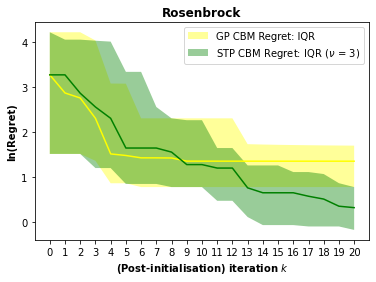

In [ ]:
### Visualise!

title = obj_func

plt.figure()

plt.plot(median_gp, color = 'Yellow')
plt.plot(median_stp, color = 'Green')

xstar = np.arange(0, max_iter+1, step=1)
plt.fill_between(xstar, lower_gp, upper_gp, facecolor = 'Yellow', alpha=0.4, label='GP CBM Regret: IQR')
plt.fill_between(xstar, lower_stp, upper_stp, facecolor = 'Green', alpha=0.4, label='STP CBM Regret: IQR ' r'($\nu$' ' = {})'.format(df))

plt.title(title, weight = 'bold')
plt.xlabel('(Post-initialisation) iteration $\it{k}$', weight = 'bold') # x-axis label
plt.ylabel('ln(Regret)', weight = 'bold') # y-axis label
plt.legend(loc=0) # add plot legend

### Make the x-ticks integers, not floats:
count = len(xstar)
plt.xticks(np.arange(count), np.arange(0, count))
plt.show() #visualise!
